<a href="https://colab.research.google.com/github/pchlenski/aPTR/blob/main/notebooks/exploring_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Minimal imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle as p

# google colab specific stuff
from google.colab import drive
drive.mount('/content/drive')

dd = '/content/drive/My Drive/notebooks/16s/data/' # data directory

Mounted at /content/drive


In [2]:
# pandas settings
%load_ext google.colab.data_table

# fonts
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/drive/My Drive/fonts/Helvetica.ttf')

font = {
    'family' : 'Helvetica', 
    'size' : 24
}
mpl.rc('font', **font)

# colors - consistent with google slides 'basic light' defaults
red = '#be1e2d'
blue = '#0097a7'
yellow = '#ffab40'

# other settings
mpl.rcParams['figure.dpi'] = 350
# mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['figure.frameon'] = False
mpl.rcParams['image.cmap'] = 'magma'
mpl.rcParams['patch.facecolor'] = '#00000000'
mpl.rcParams['legend.framealpha'] = 0
mpl.rcParams['axes.facecolor'] = '#fffff800'
mpl.rcParams['axes.linewidth'] = 2

# turn off spines
# mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
# mpl.rcParams['axes.spines.left'] = False

In [92]:
performance = pd.read_pickle(f"{dd}all_solutions3.pkl")
performance = performance.dropna()
performance

genome    sample       ptr  true_ptr       err
0    59931.4  sample_0  1.529724  1.608782  0.079058
1    59931.4  sample_1  1.837320  1.819108  0.018213
2    59931.4  sample_2  1.316921  1.403344  0.086423
3    59931.4  sample_3  1.636318  1.669361  0.033042
4    59931.4  sample_4  1.231734  1.227539  0.004194
..       ...       ...       ...       ...       ...
10  196600.6  sample_5  0.318232  1.169696  0.851464
12  196600.6  sample_6  1.009466  1.978256  0.968790
14  196600.6  sample_7  1.009110  1.707356  0.698246
16  196600.6  sample_8  0.103300  1.228662  1.125362
18  196600.6  sample_9  1.009318  1.500450  0.491133

[11770 rows x 5 columns]

# Graphing

In [93]:
average_errors = performance.groupby('genome').mean()['err'].sort_values()

(0.0, 260.0)

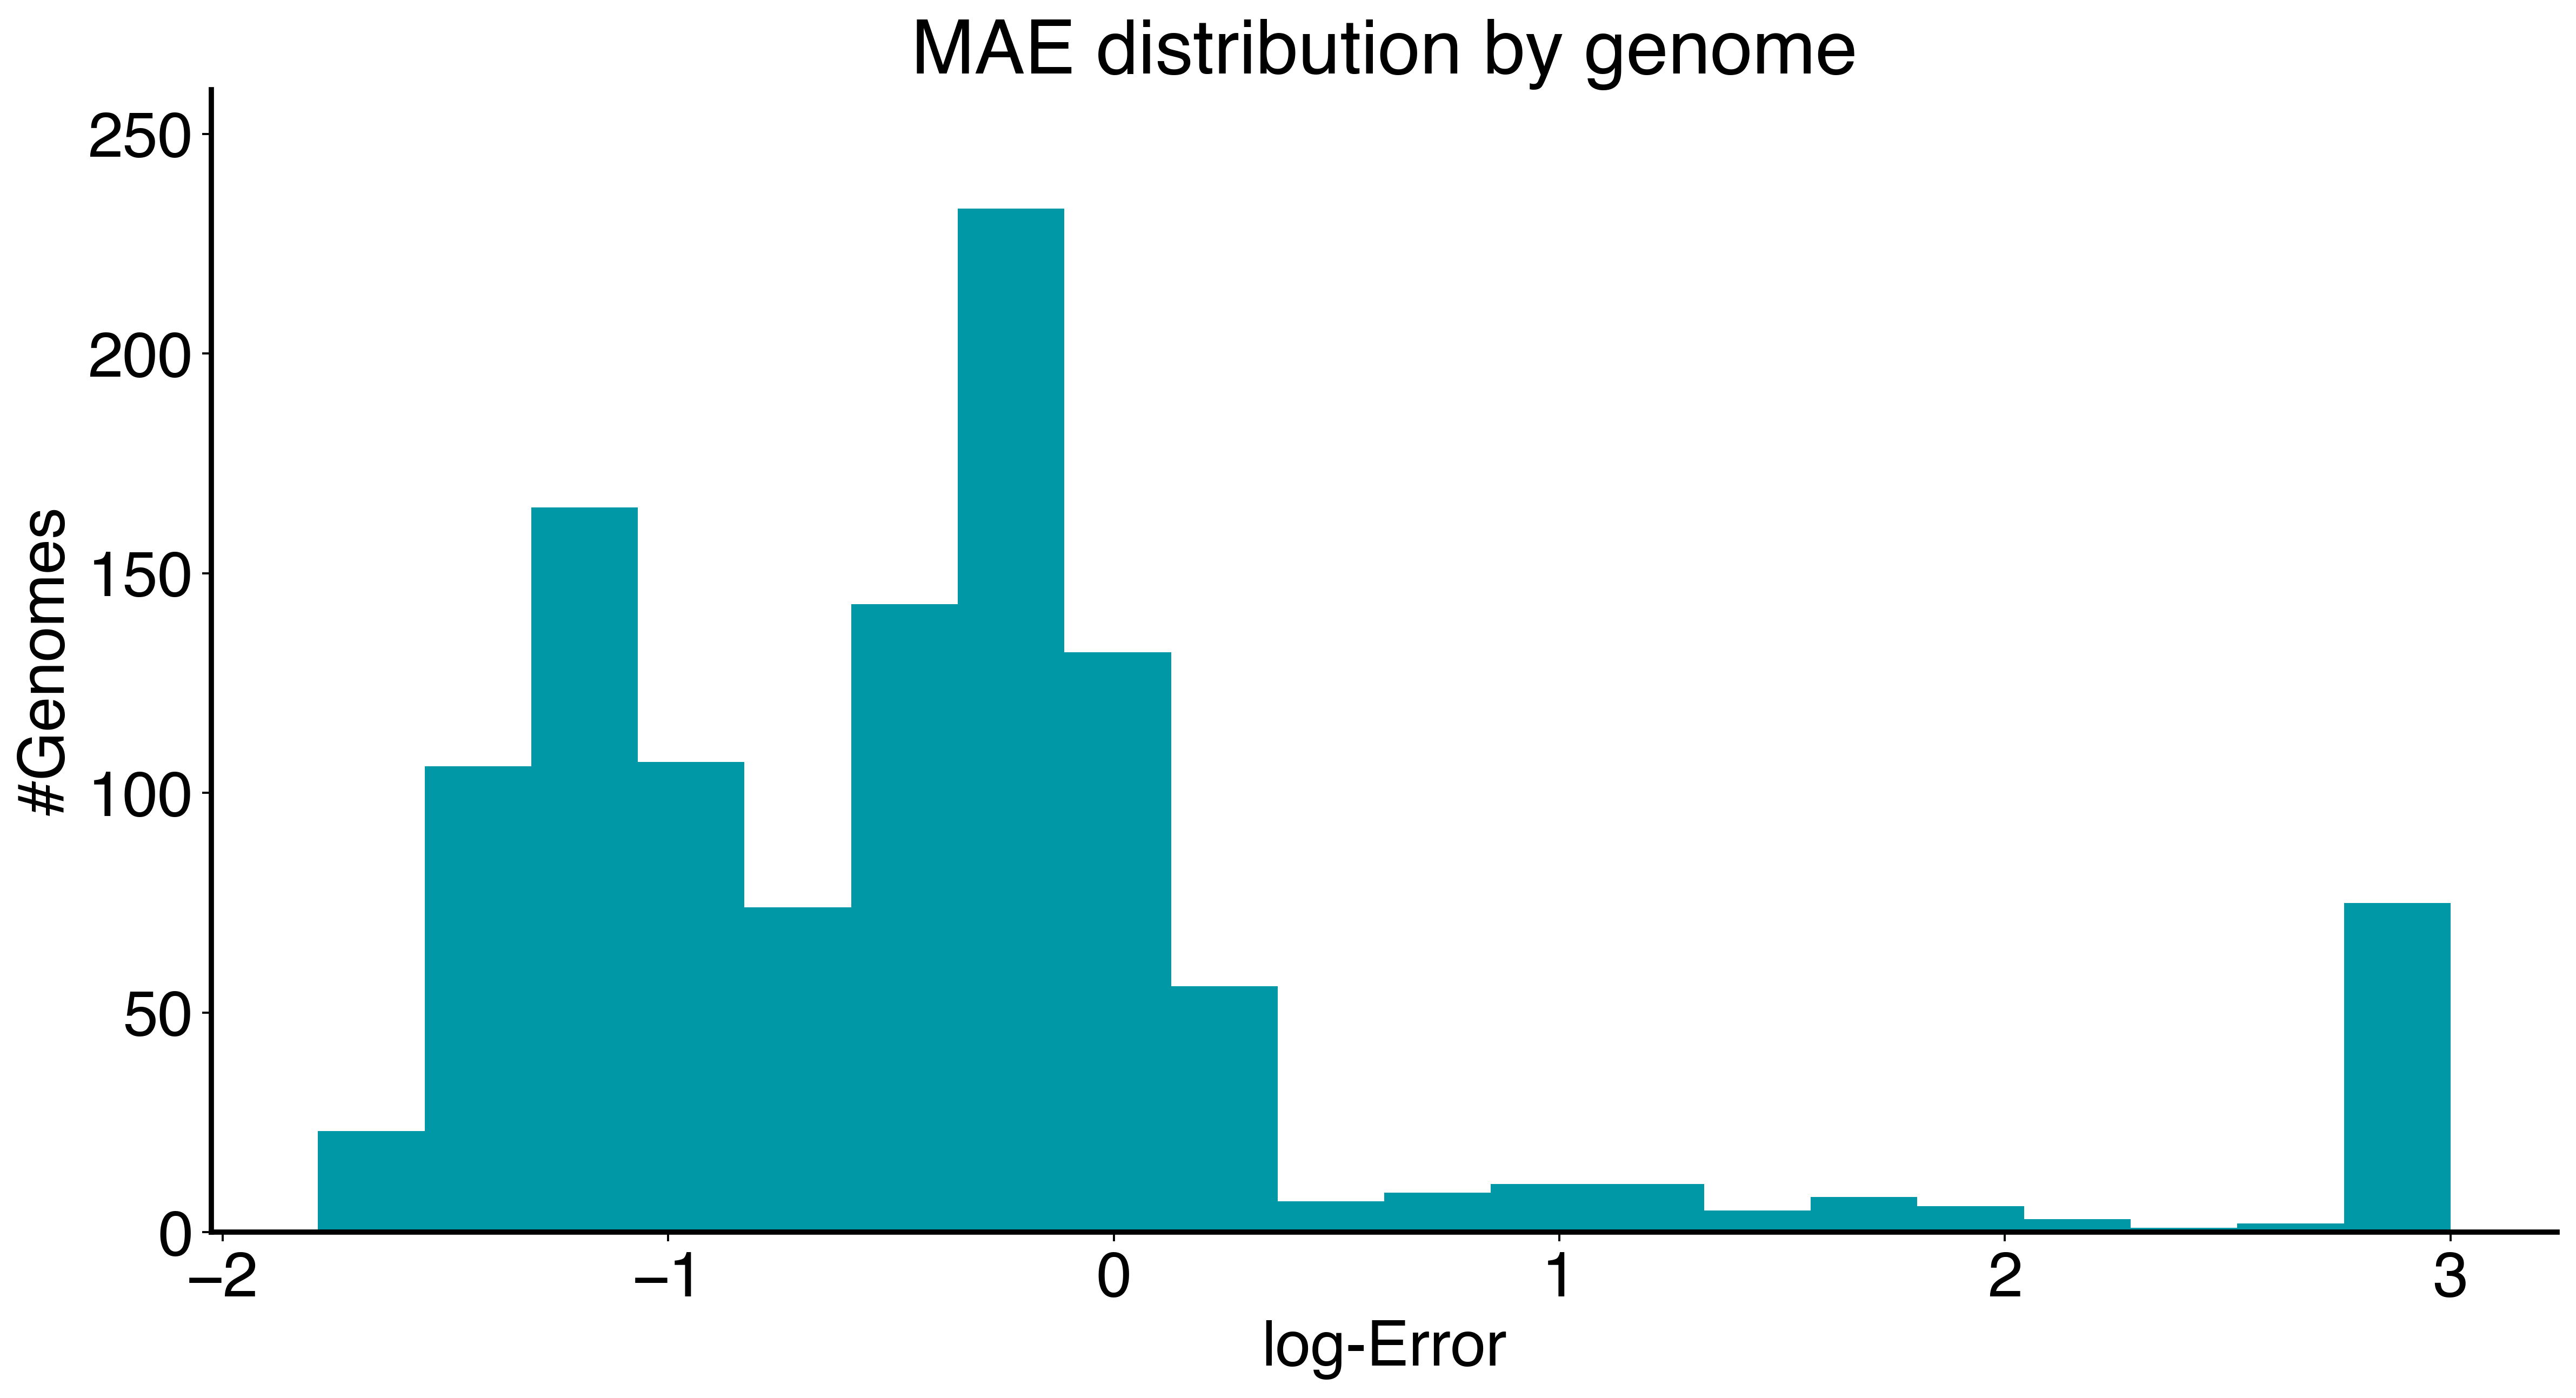

In [94]:
np.log10(np.clip(average_errors, 0, 1000)).hist(bins=20, color=blue)
plt.grid(False)
plt.title("MAE distribution by genome")
plt.ylabel("#Genomes")
plt.xlabel("log-Error")
plt.ylim(0,260)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


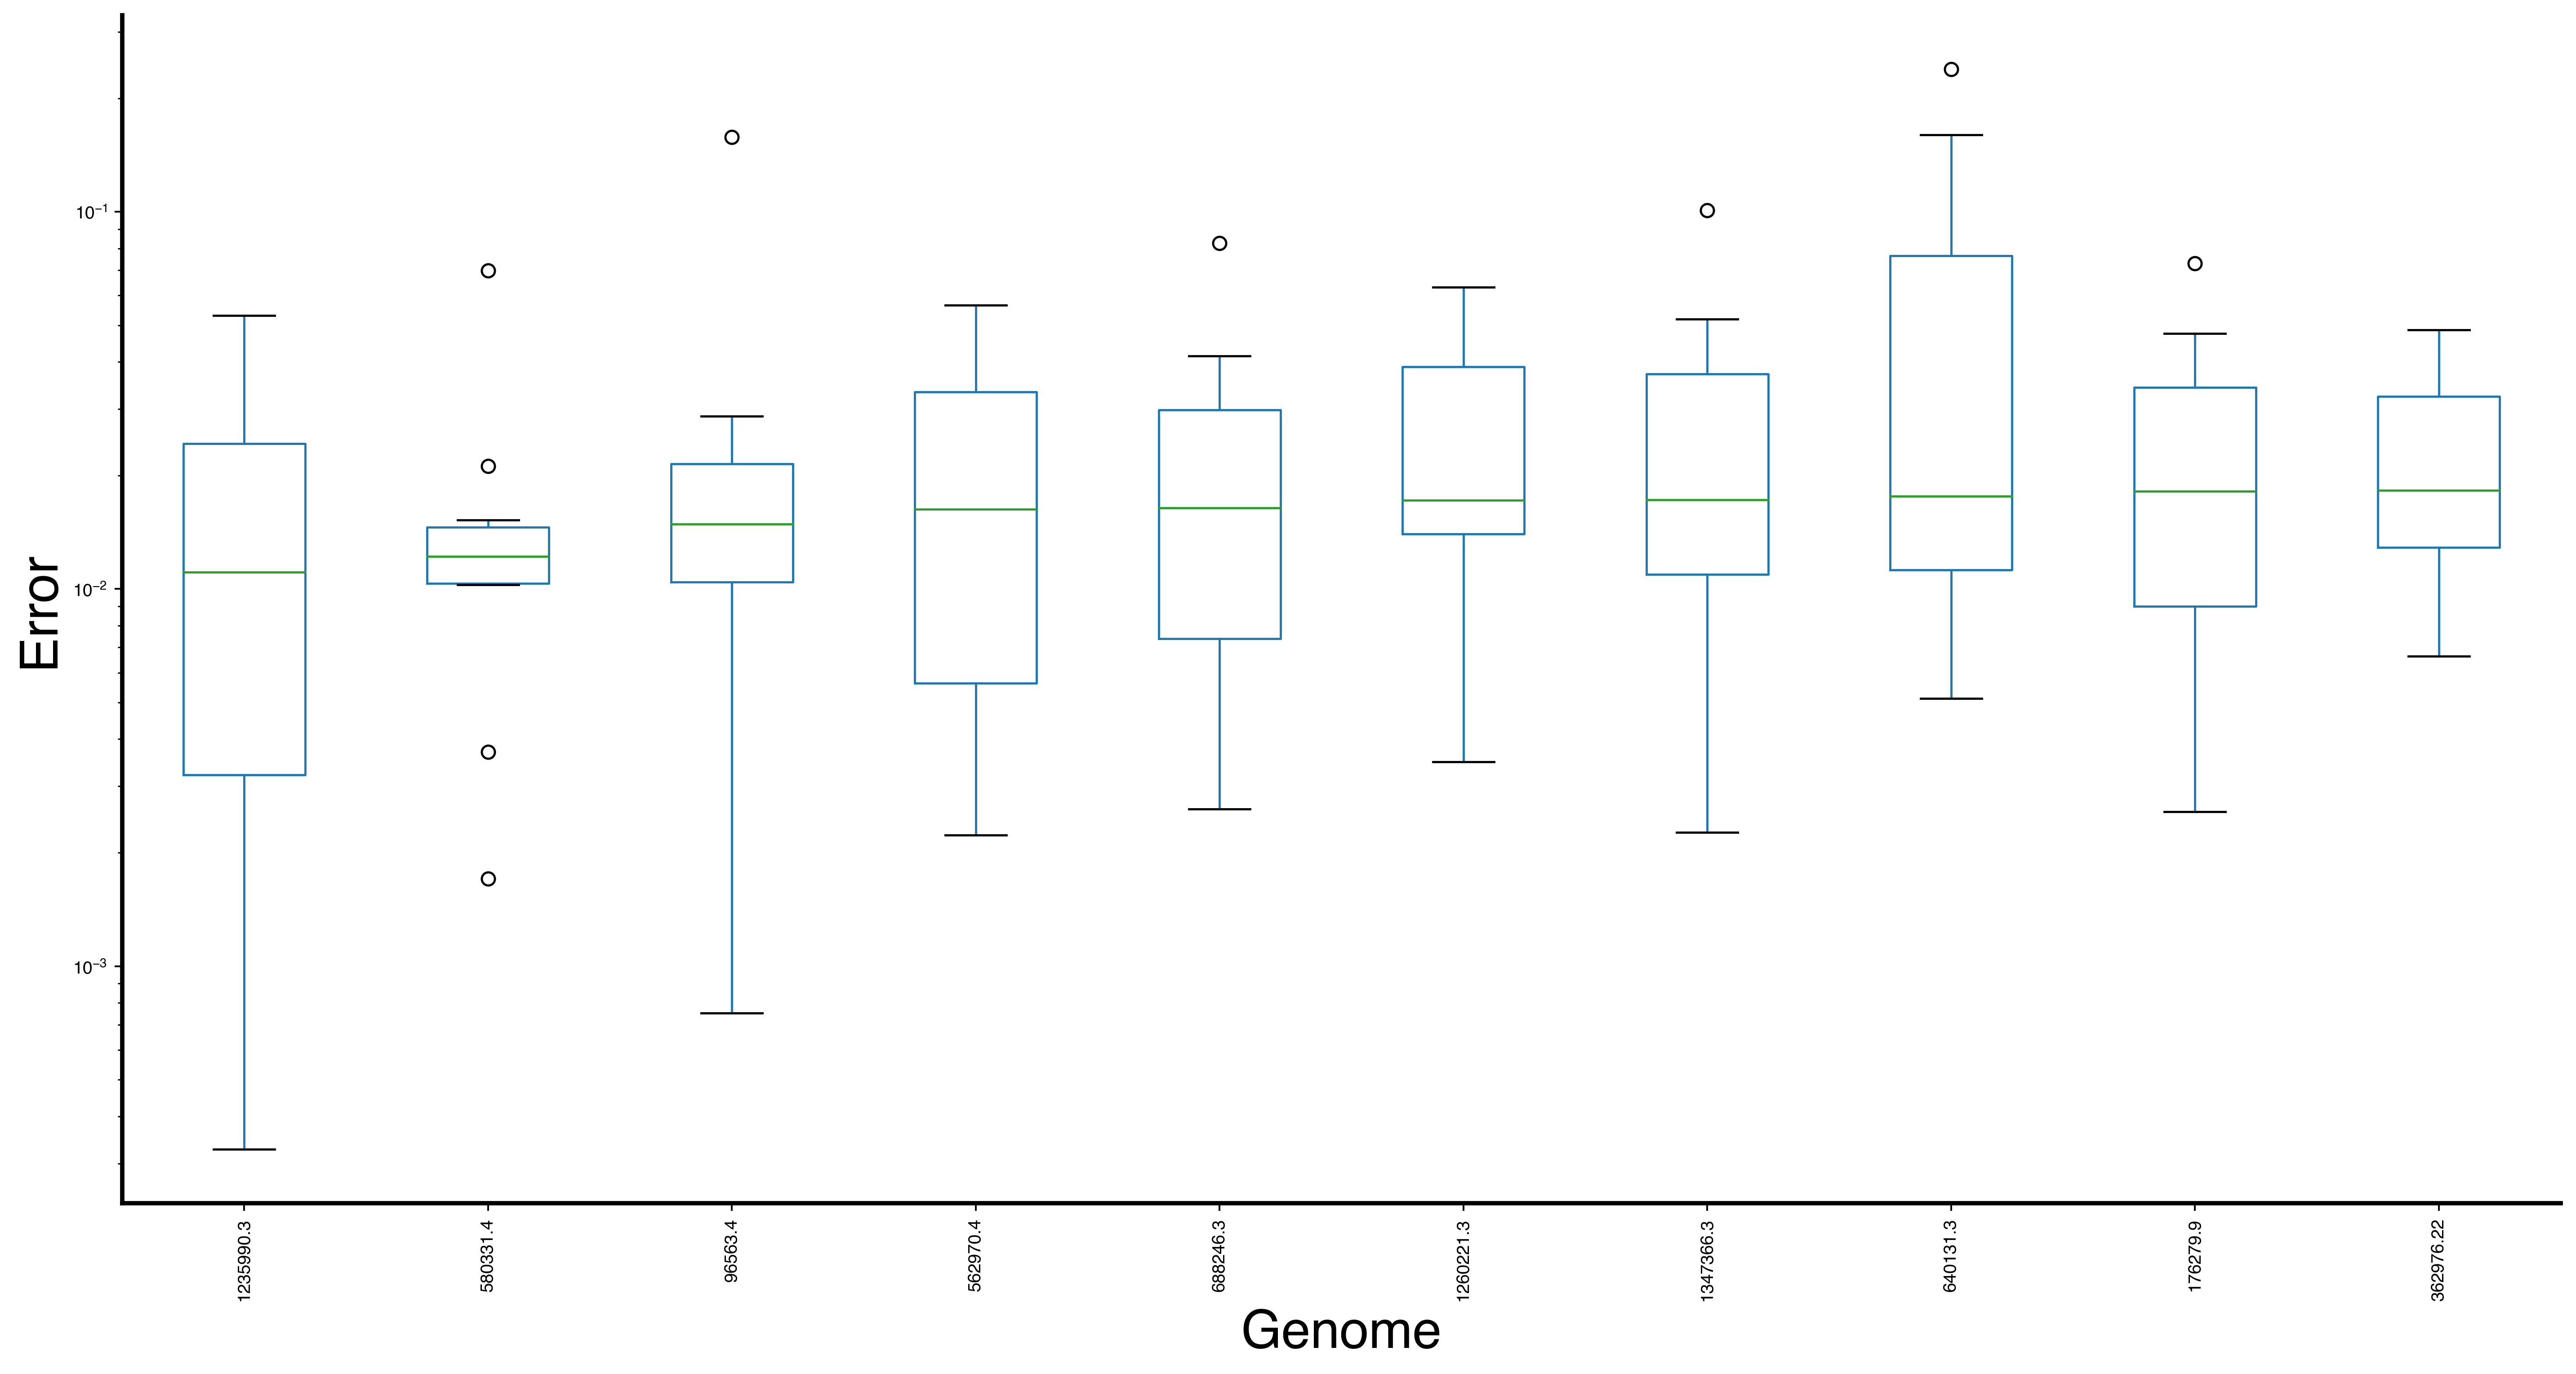

In [95]:
# Show errors as boxplots

fig = plt.figure(figsize=(20,10))
to_plot = performance[["genome", "err"]]
to_plot["err"] = to_plot["err"].fillna(100)
to_plot["err"] = np.clip(to_plot["err"], 0, 100)
grouped = to_plot.groupby("genome")

# sort: inspired by https://stackoverflow.com/questions/21912634/how-can-i-sort-a-boxplot-in-pandas-by-the-median-values
df2 = pd.DataFrame({col:vals["err"] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=True, inplace=True)
df2 = df2[meds.index]

# crop to 200
df3 = df2.transpose().head(10).transpose()
df3.boxplot(fontsize=8, rot=90, grid=False)

# clean up labels
ticks, labels = plt.xticks()
new_labels = [x._text.split(",")[0].lstrip("(") for x in labels]
plt.xticks(ticks, new_labels)
plt.yscale("log")
plt.xlabel("Genome")
plt.ylabel("Error")

plt.show()

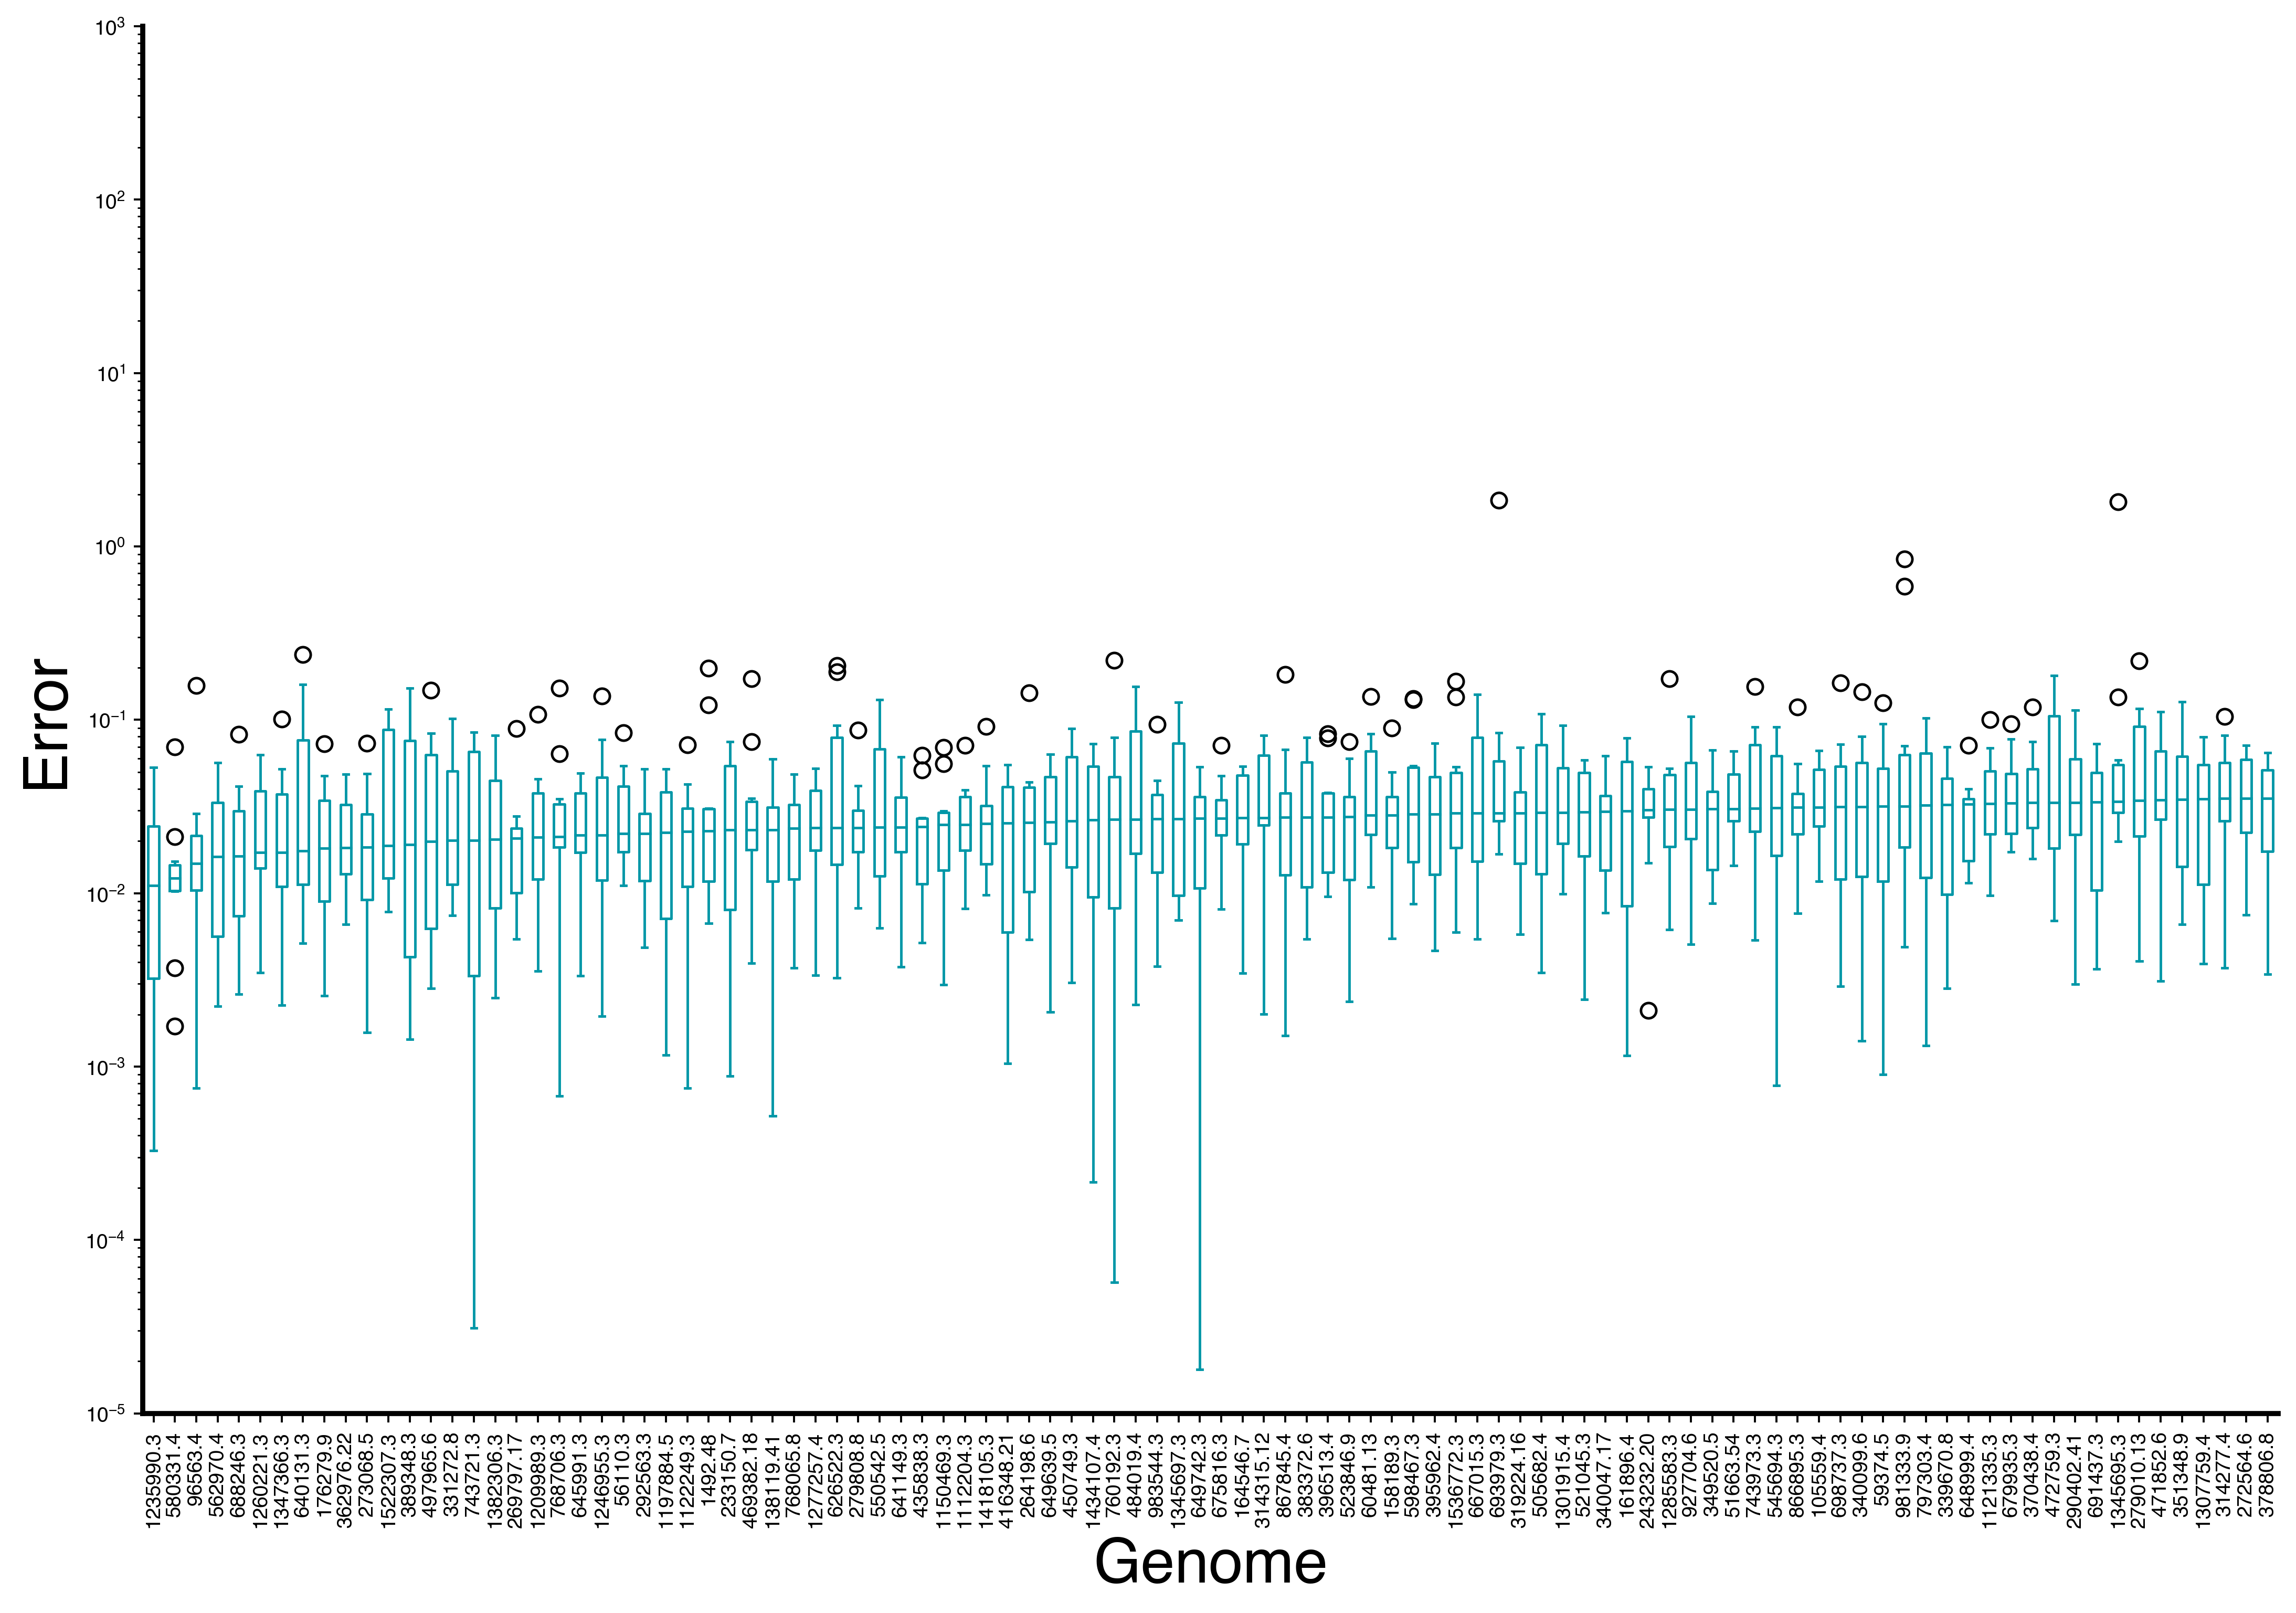

In [12]:
# left side
fig = plt.figure(figsize=(15,10))
df4 = df2.transpose().head(100).transpose()
df4.boxplot(fontsize=8, rot=90, grid=False, color=blue)

# clean up labels
ticks, labels = plt.xticks()
new_labels = [x._text.split(",")[0].lstrip("(") for x in labels]
plt.xticks(ticks, new_labels)
plt.yscale("log")
plt.xlabel("Genome")
plt.ylabel("Error")
plt.ylim(1e-5, 1e3)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


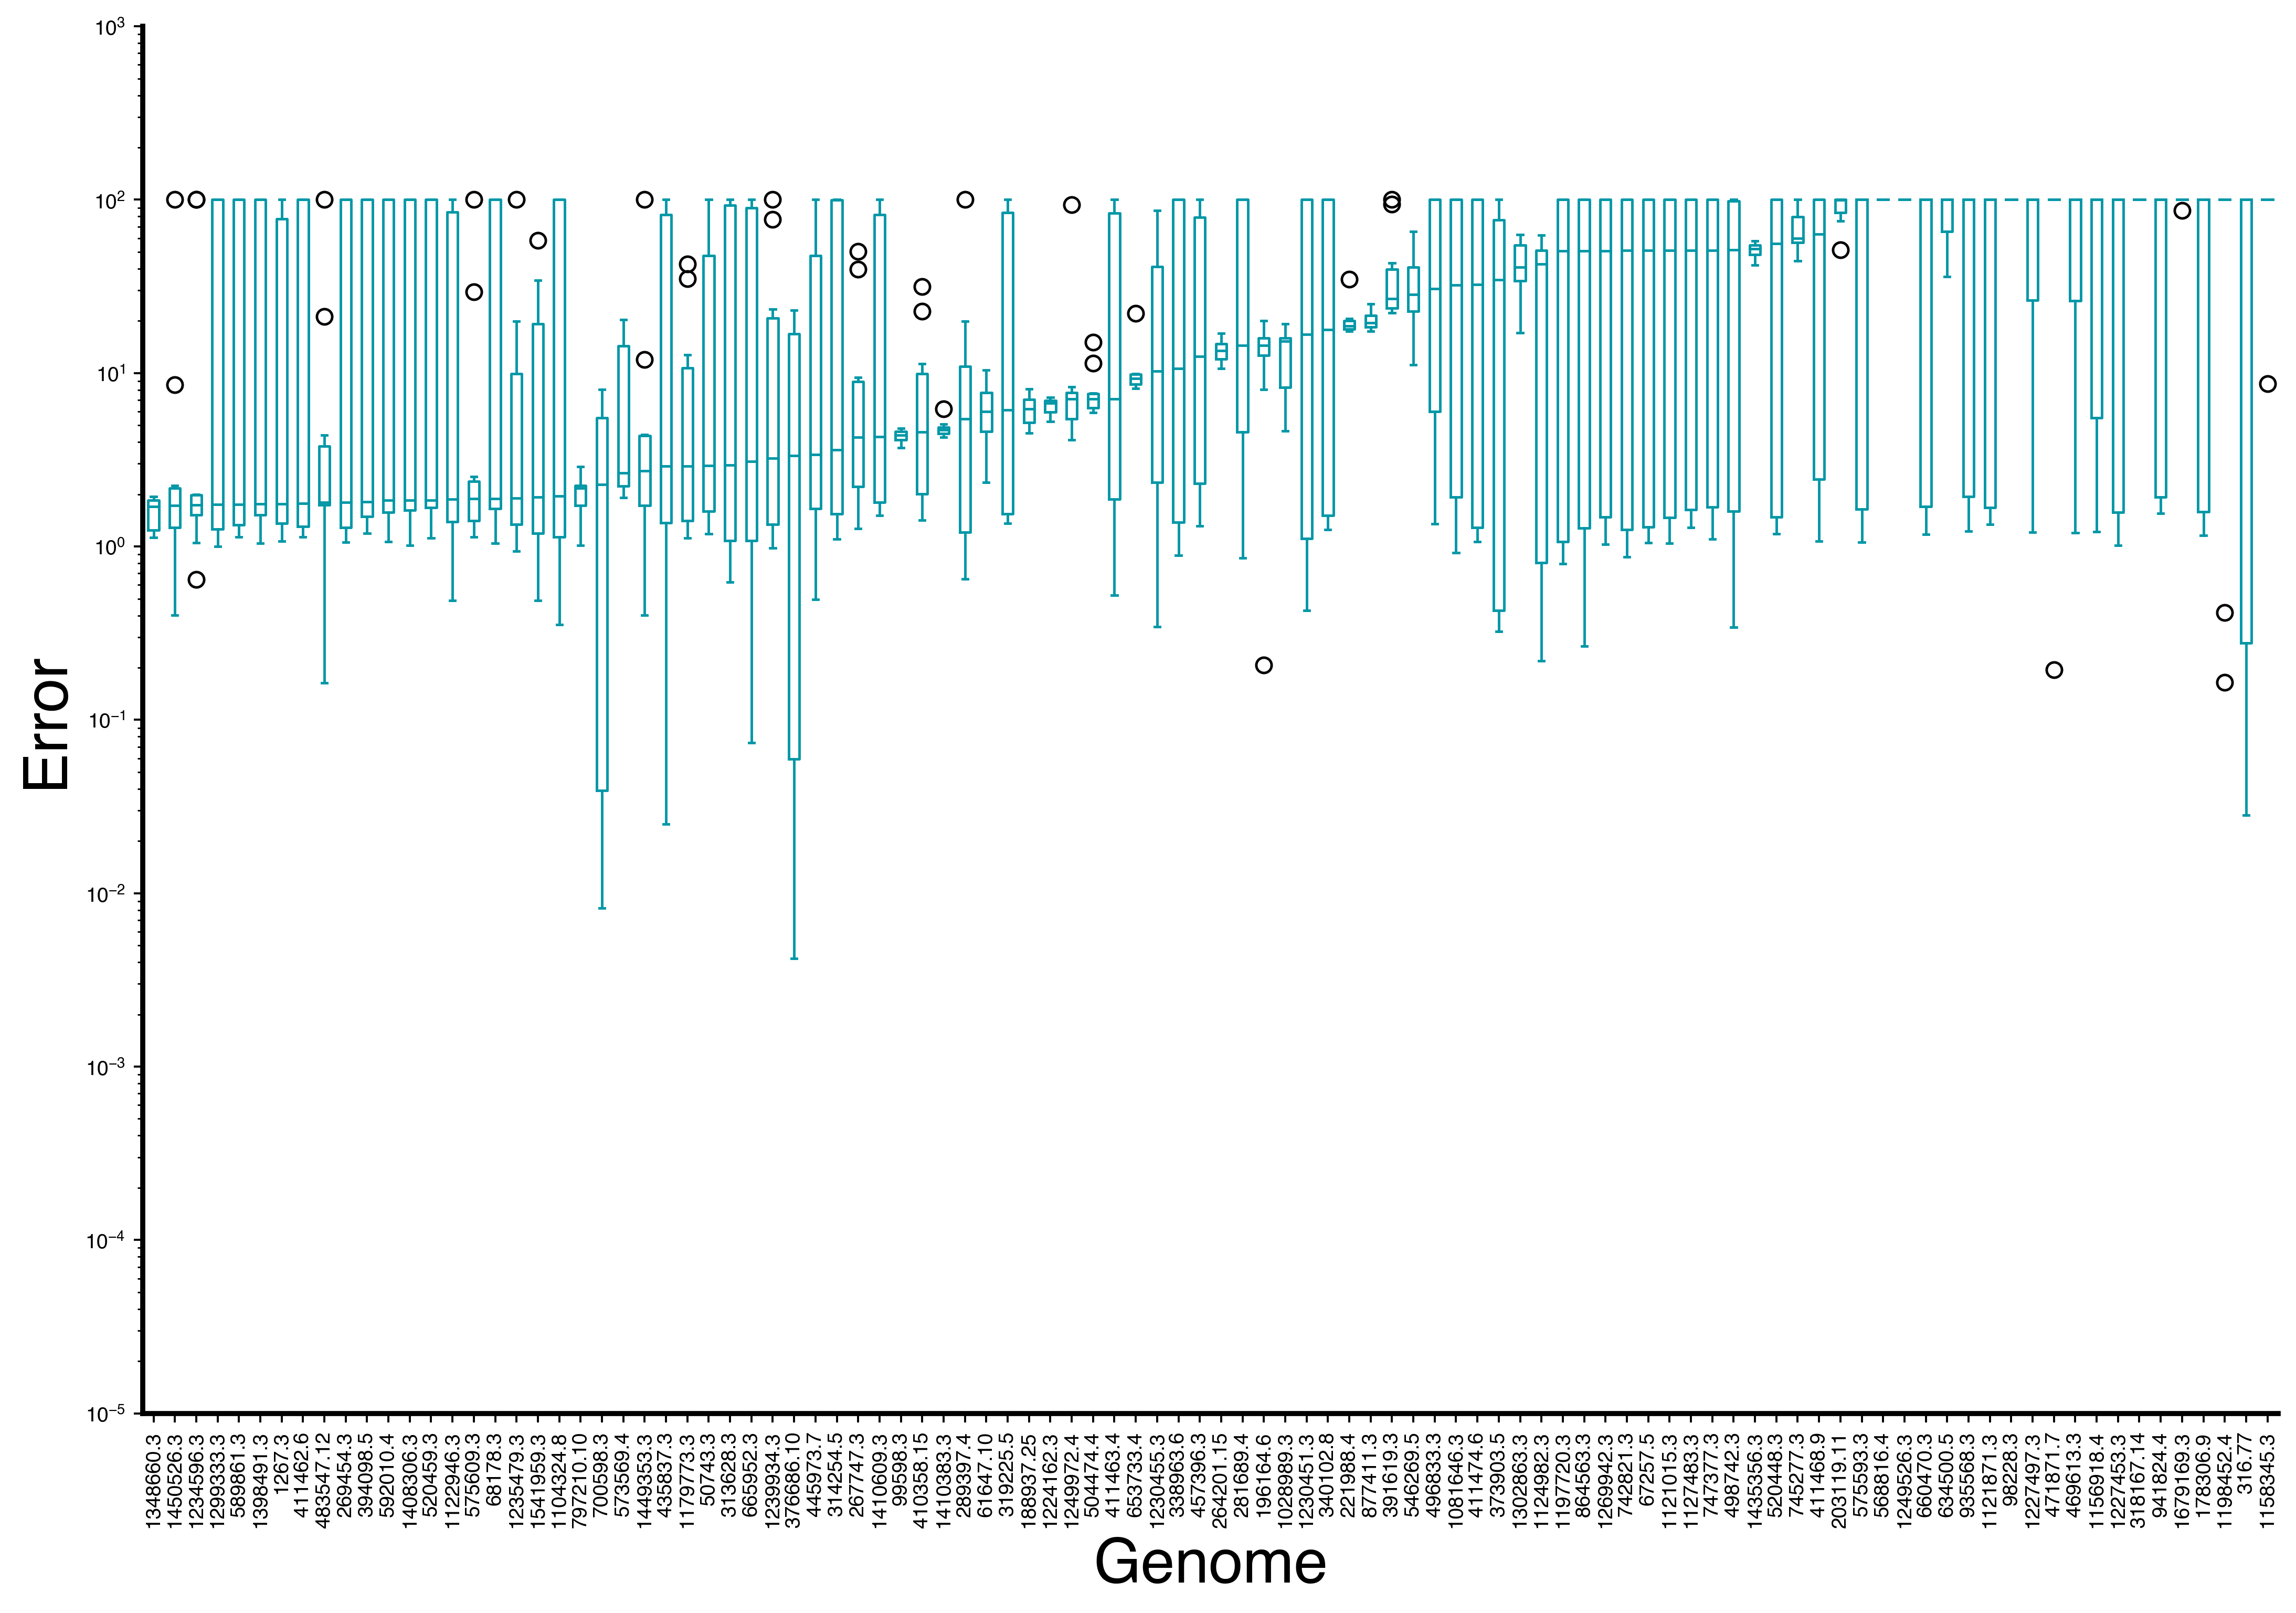

In [15]:
# right side
fig = plt.figure(figsize=(15,10))
df4 = df2.transpose().tail(100).transpose()
df4.boxplot(fontsize=8, rot=90, grid=False, color=blue)

# clean up labels
ticks, labels = plt.xticks()
new_labels = [x._text.split(",")[0].lstrip("(") for x in labels]
plt.xticks(ticks, new_labels)
plt.yscale("log")
plt.xlabel("Genome")
plt.ylabel("Error")
plt.ylim(1e-5, 1e3)
plt.axes().spines.left = False

plt.show()

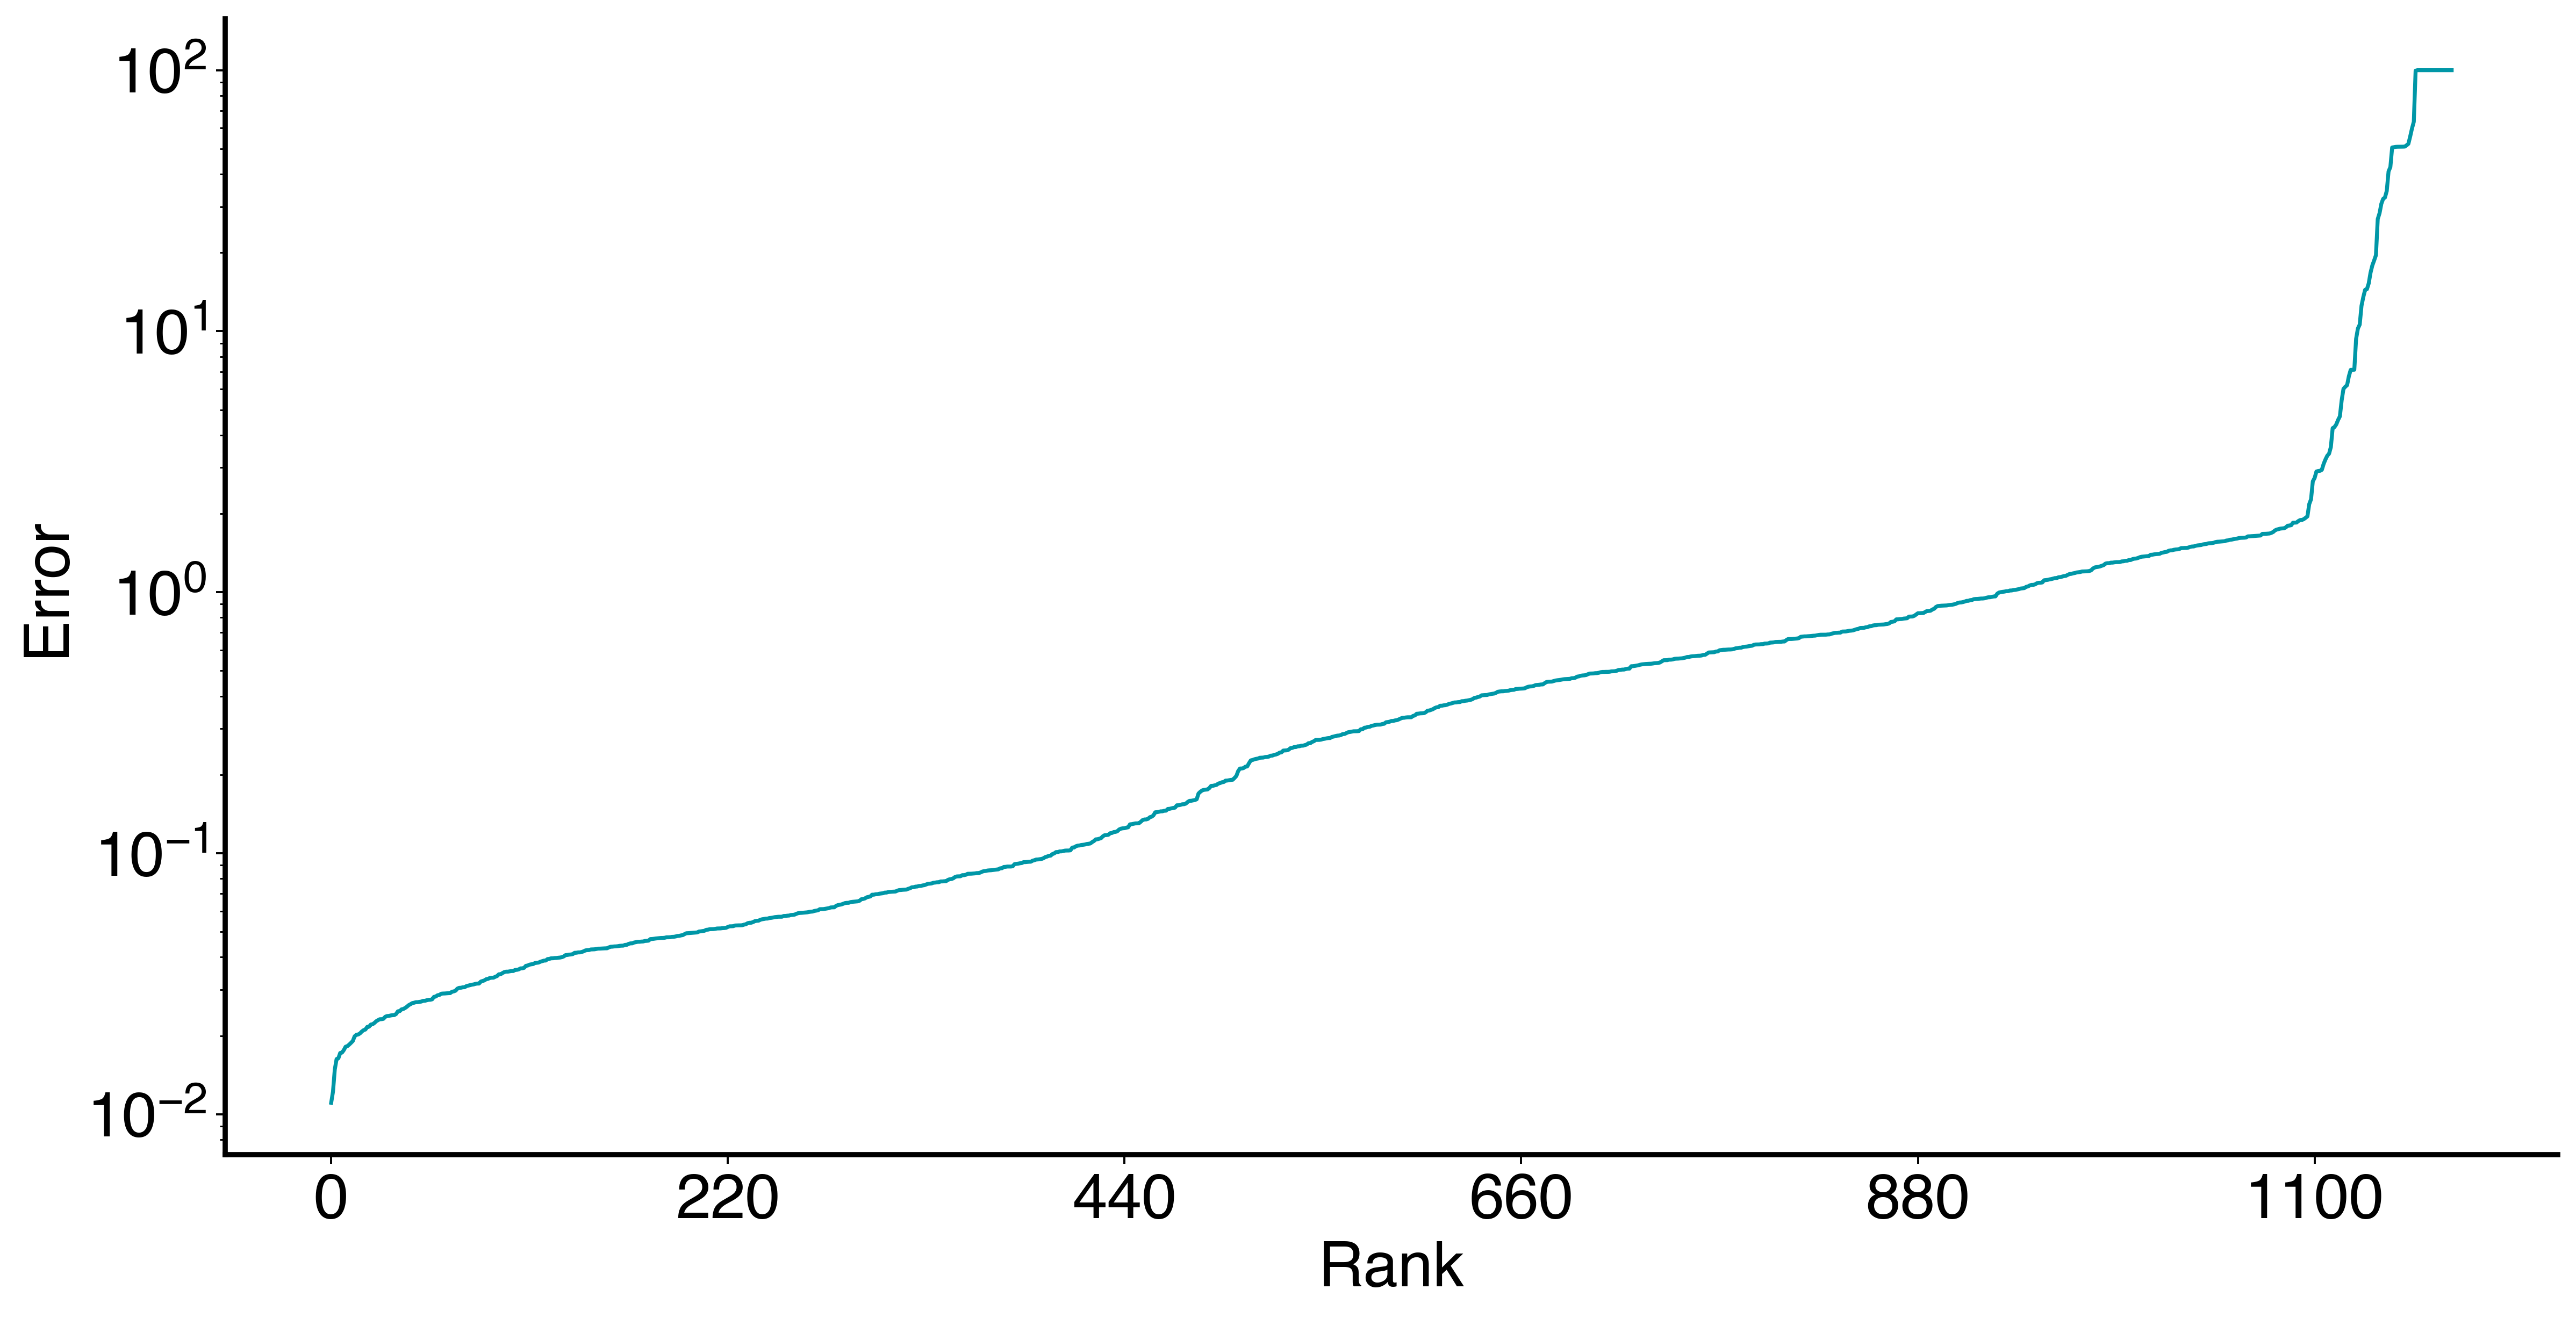

In [17]:
plt.plot(meds, color=blue)
plt.yscale('log')
plt.ylabel("Error")
plt.xlabel("Rank")
plt.xticks(np.linspace(0, 1100, 6, dtype=np.int), np.linspace(0, 1100, 6, dtype=np.int))
plt.show()

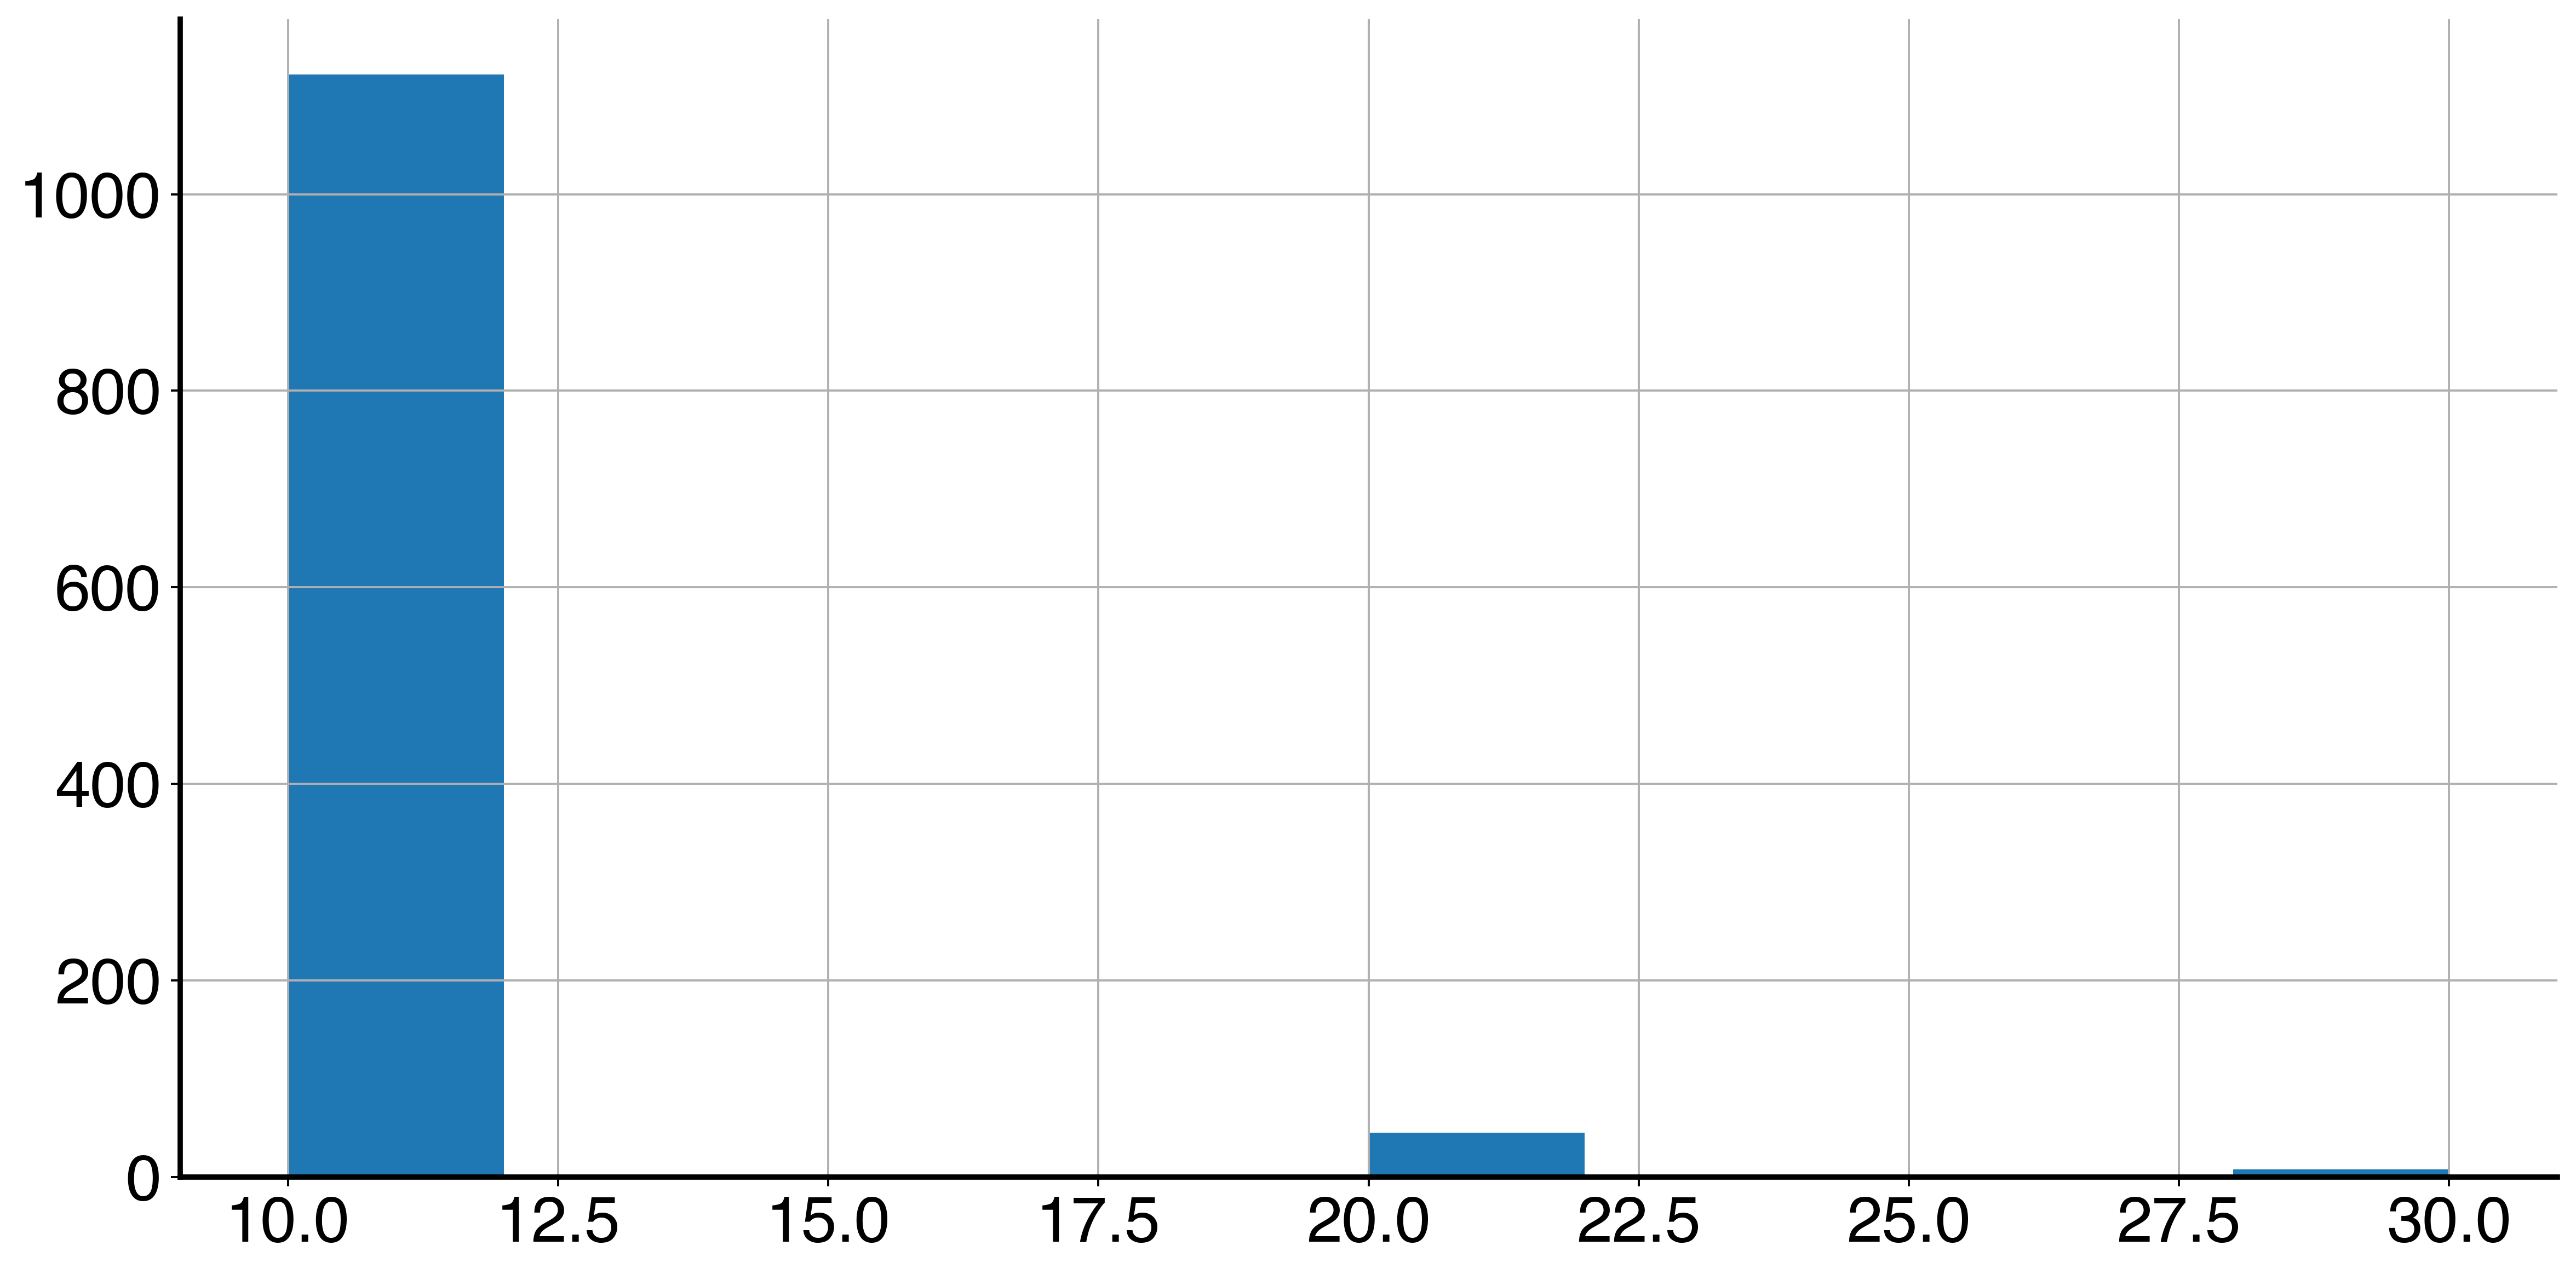

In [ ]:
performance.groupby("genome").count()["sample"].hist()

# Exploring genome properties

In [ ]:
!pip install biopython
!git clone https://github.com/pchlenski/aPTR
!cd /content/aPTR && git pull

from aPTR.src.db import RnaDB
from aPTR.util.simulation import generate_otu_matrix
from aPTR.src.solver import solve_matrix
# from aPTR.test.tests import *

db = RnaDB(f"{dd}/db.pkl", f"{dd}/collisions.pkl")

fatal: destination path 'aPTR' already exists and is not an empty directory.
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6 (delta 3), reused 6 (delta 3), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/pchlenski/aPTR
   cf20d42..e7daa30  main       -> origin/main
Updating cf20d42..e7daa30
Fast-forward
 src/db.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [ ]:
errors = performance.groupby('genome').median()['err']
worst_errors = errors[errors > 1]
worst_genomes = worst_errors.index

worst_genomes

Index(['1002804.6', '1003195.29', '1028989.3', '1034807.5', '103855.15',
       '1051502.3', '1052585.4', '1081646.3', '1090318.6', '1104324.8',
       ...
       '879308.3', '880478.3', '882086.3', '883112.3', '935568.3', '936155.3',
       '941824.4', '98228.3', '990370.3', '99598.3'],
      dtype='object', name='genome', length=218)

In [ ]:
db[list(worst_genomes)]

TypeError: ignored

# Finding culprits

In [20]:
!pip install biopython
!git clone https://github.com/pchlenski/aPTR
!cd /content/aPTR && git pull

from aPTR.src.db import RnaDB
from aPTR.util.simulation import generate_otu_matrix
from aPTR.src.solver import solve_matrix
# from aPTR.test.tests import *

db = RnaDB(f"{dd}/db.pkl", f"{dd}/collisions.pkl")

     |████████████████████████████████| 2.3 MB 34.0 MB/s 
Cloning into 'aPTR'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (335/335), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 335 (delta 178), reused 202 (delta 83), pack-reused 0
Receiving objects: 100% (335/335), 22.02 MiB | 6.75 MiB/s, done.
Resolving deltas: 100% (178/178), done.
Already up to date.


In [33]:
n_16s = db.db.groupby('genome').count()['16s_sequence'].reindex(meds.index)
n_16s_unique = db.db.groupby('genome').nunique()['16s_sequence'].reindex(meds.index)

Text(0.5, 1.0, 'Error as a function of 16S copy number')

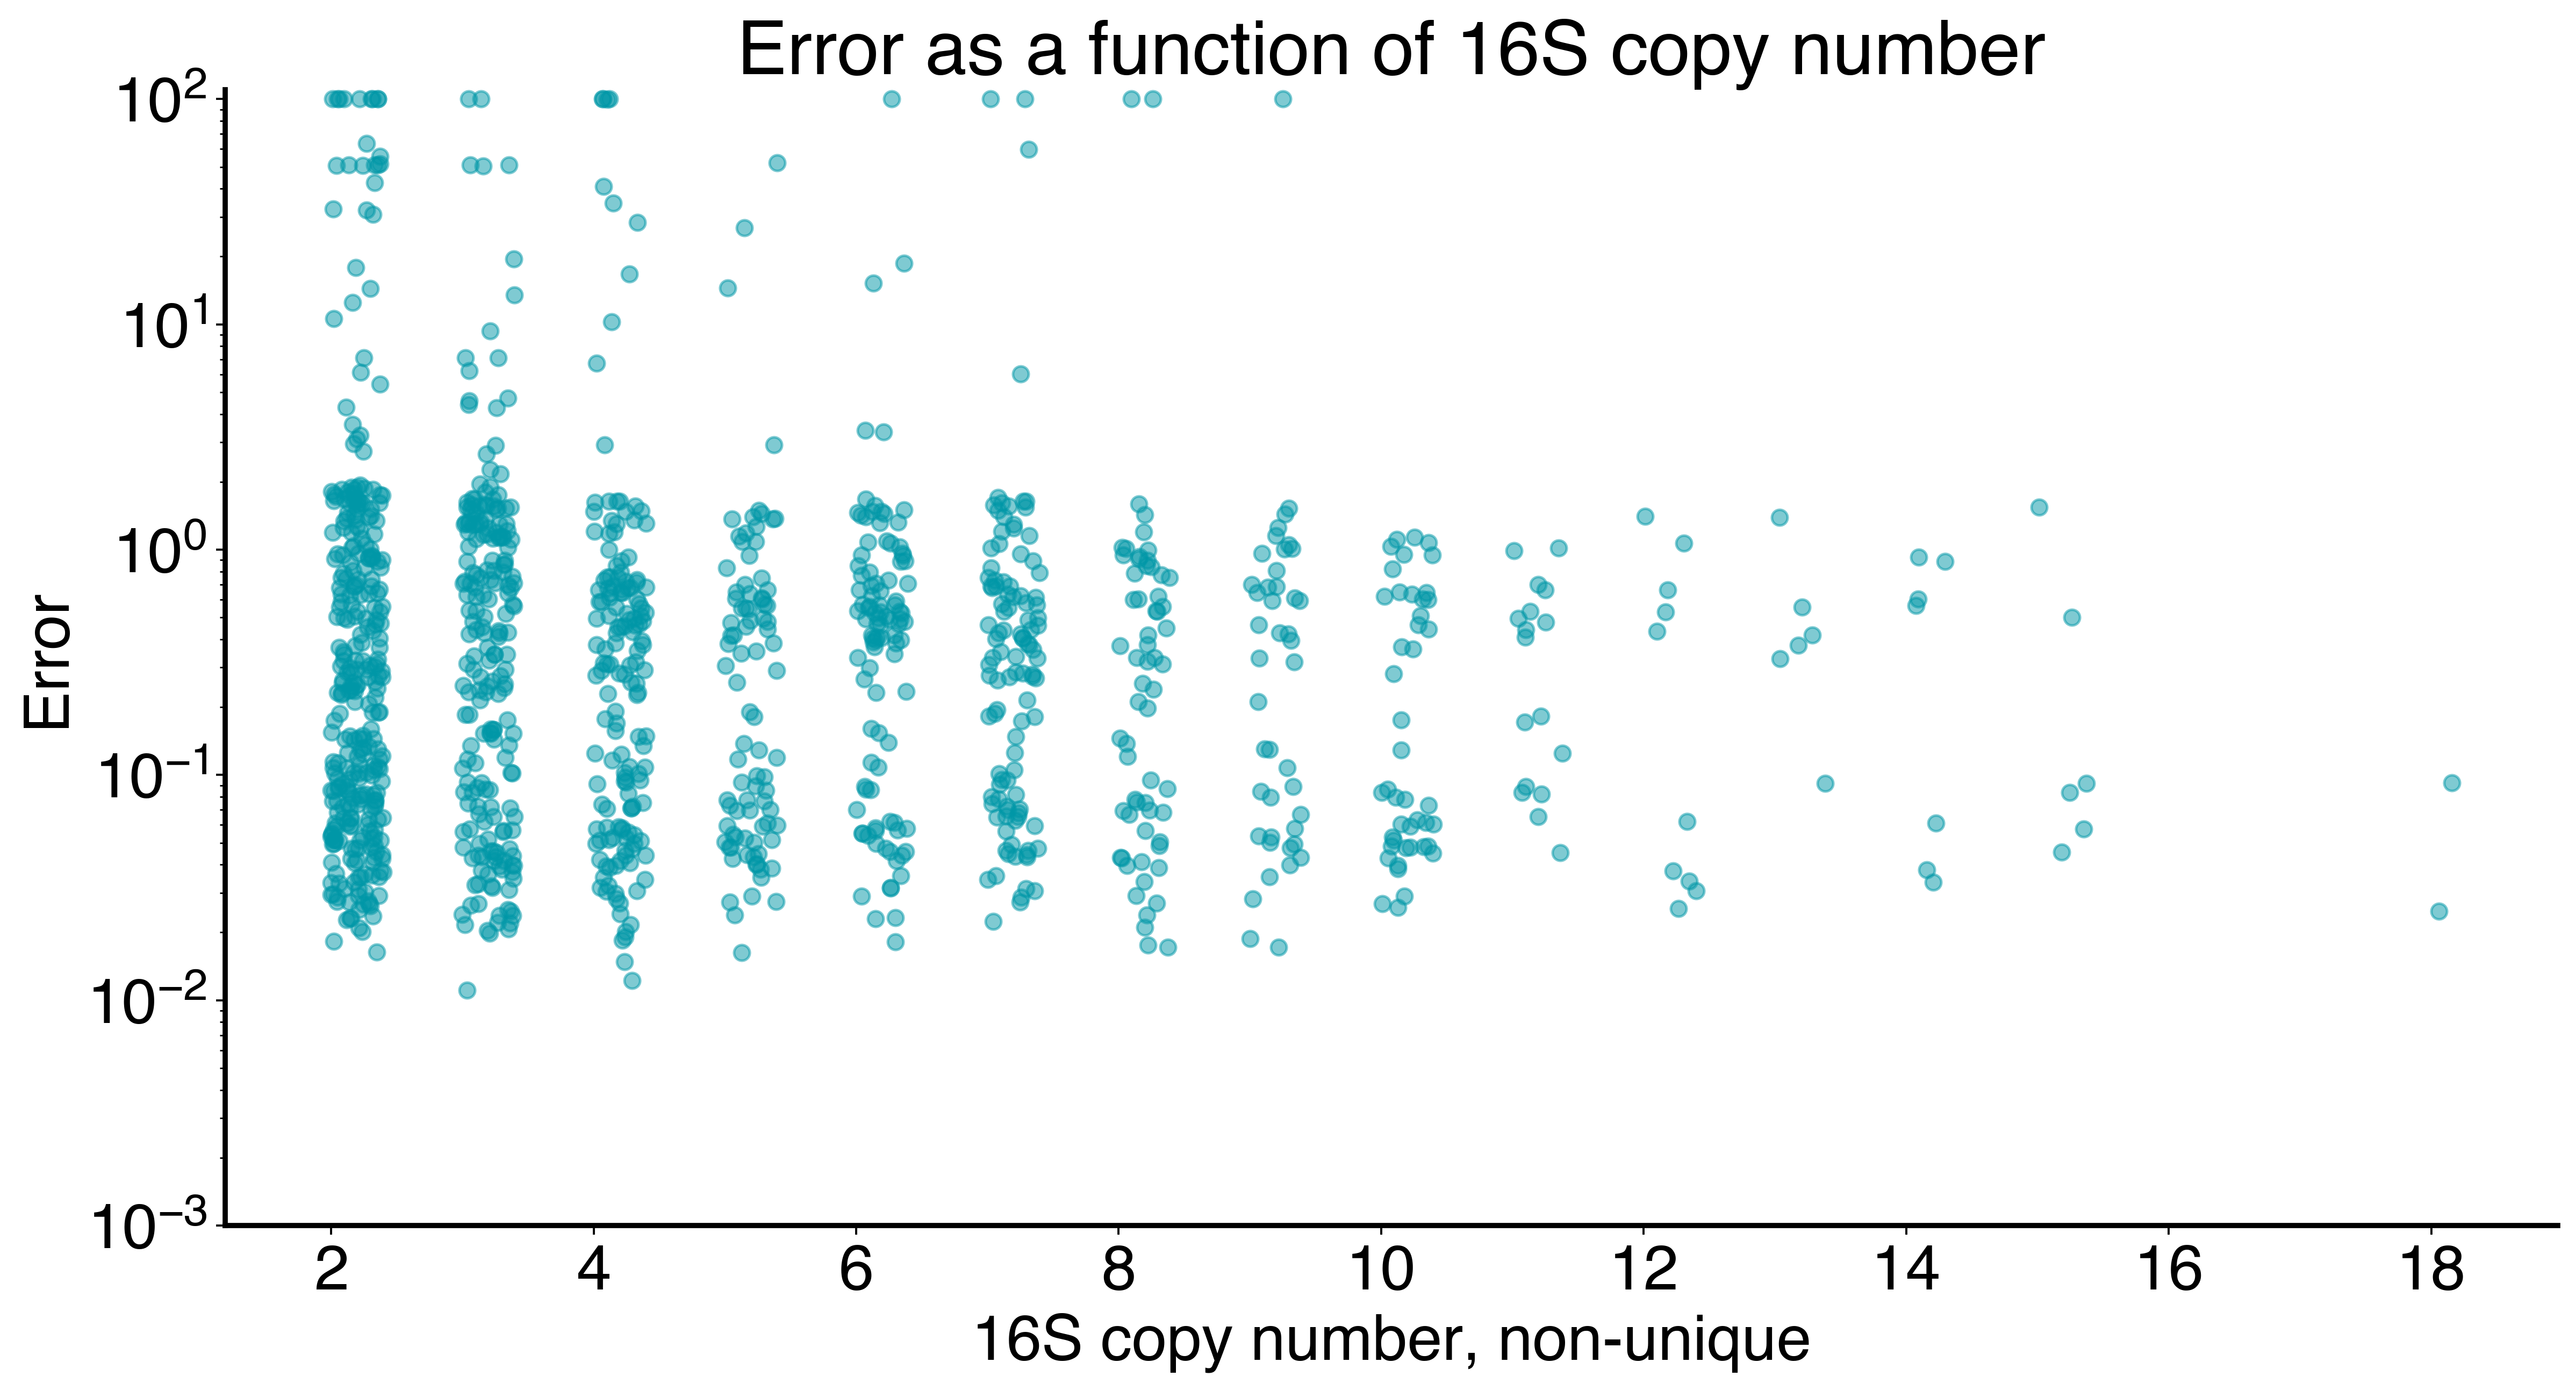

In [34]:
plt.scatter(n_16s + 0.4*(1-np.random.rand(len(meds))), meds, color=blue, alpha=0.5)
plt.yscale('log')
plt.ylim(1e-3, 1e2+10)
plt.xlabel('16S copy number, non-unique')
plt.ylabel('Error')
plt.title('Error as a function of 16S copy number')

Text(0.5, 1.0, 'Error as a function of unique 16S number')

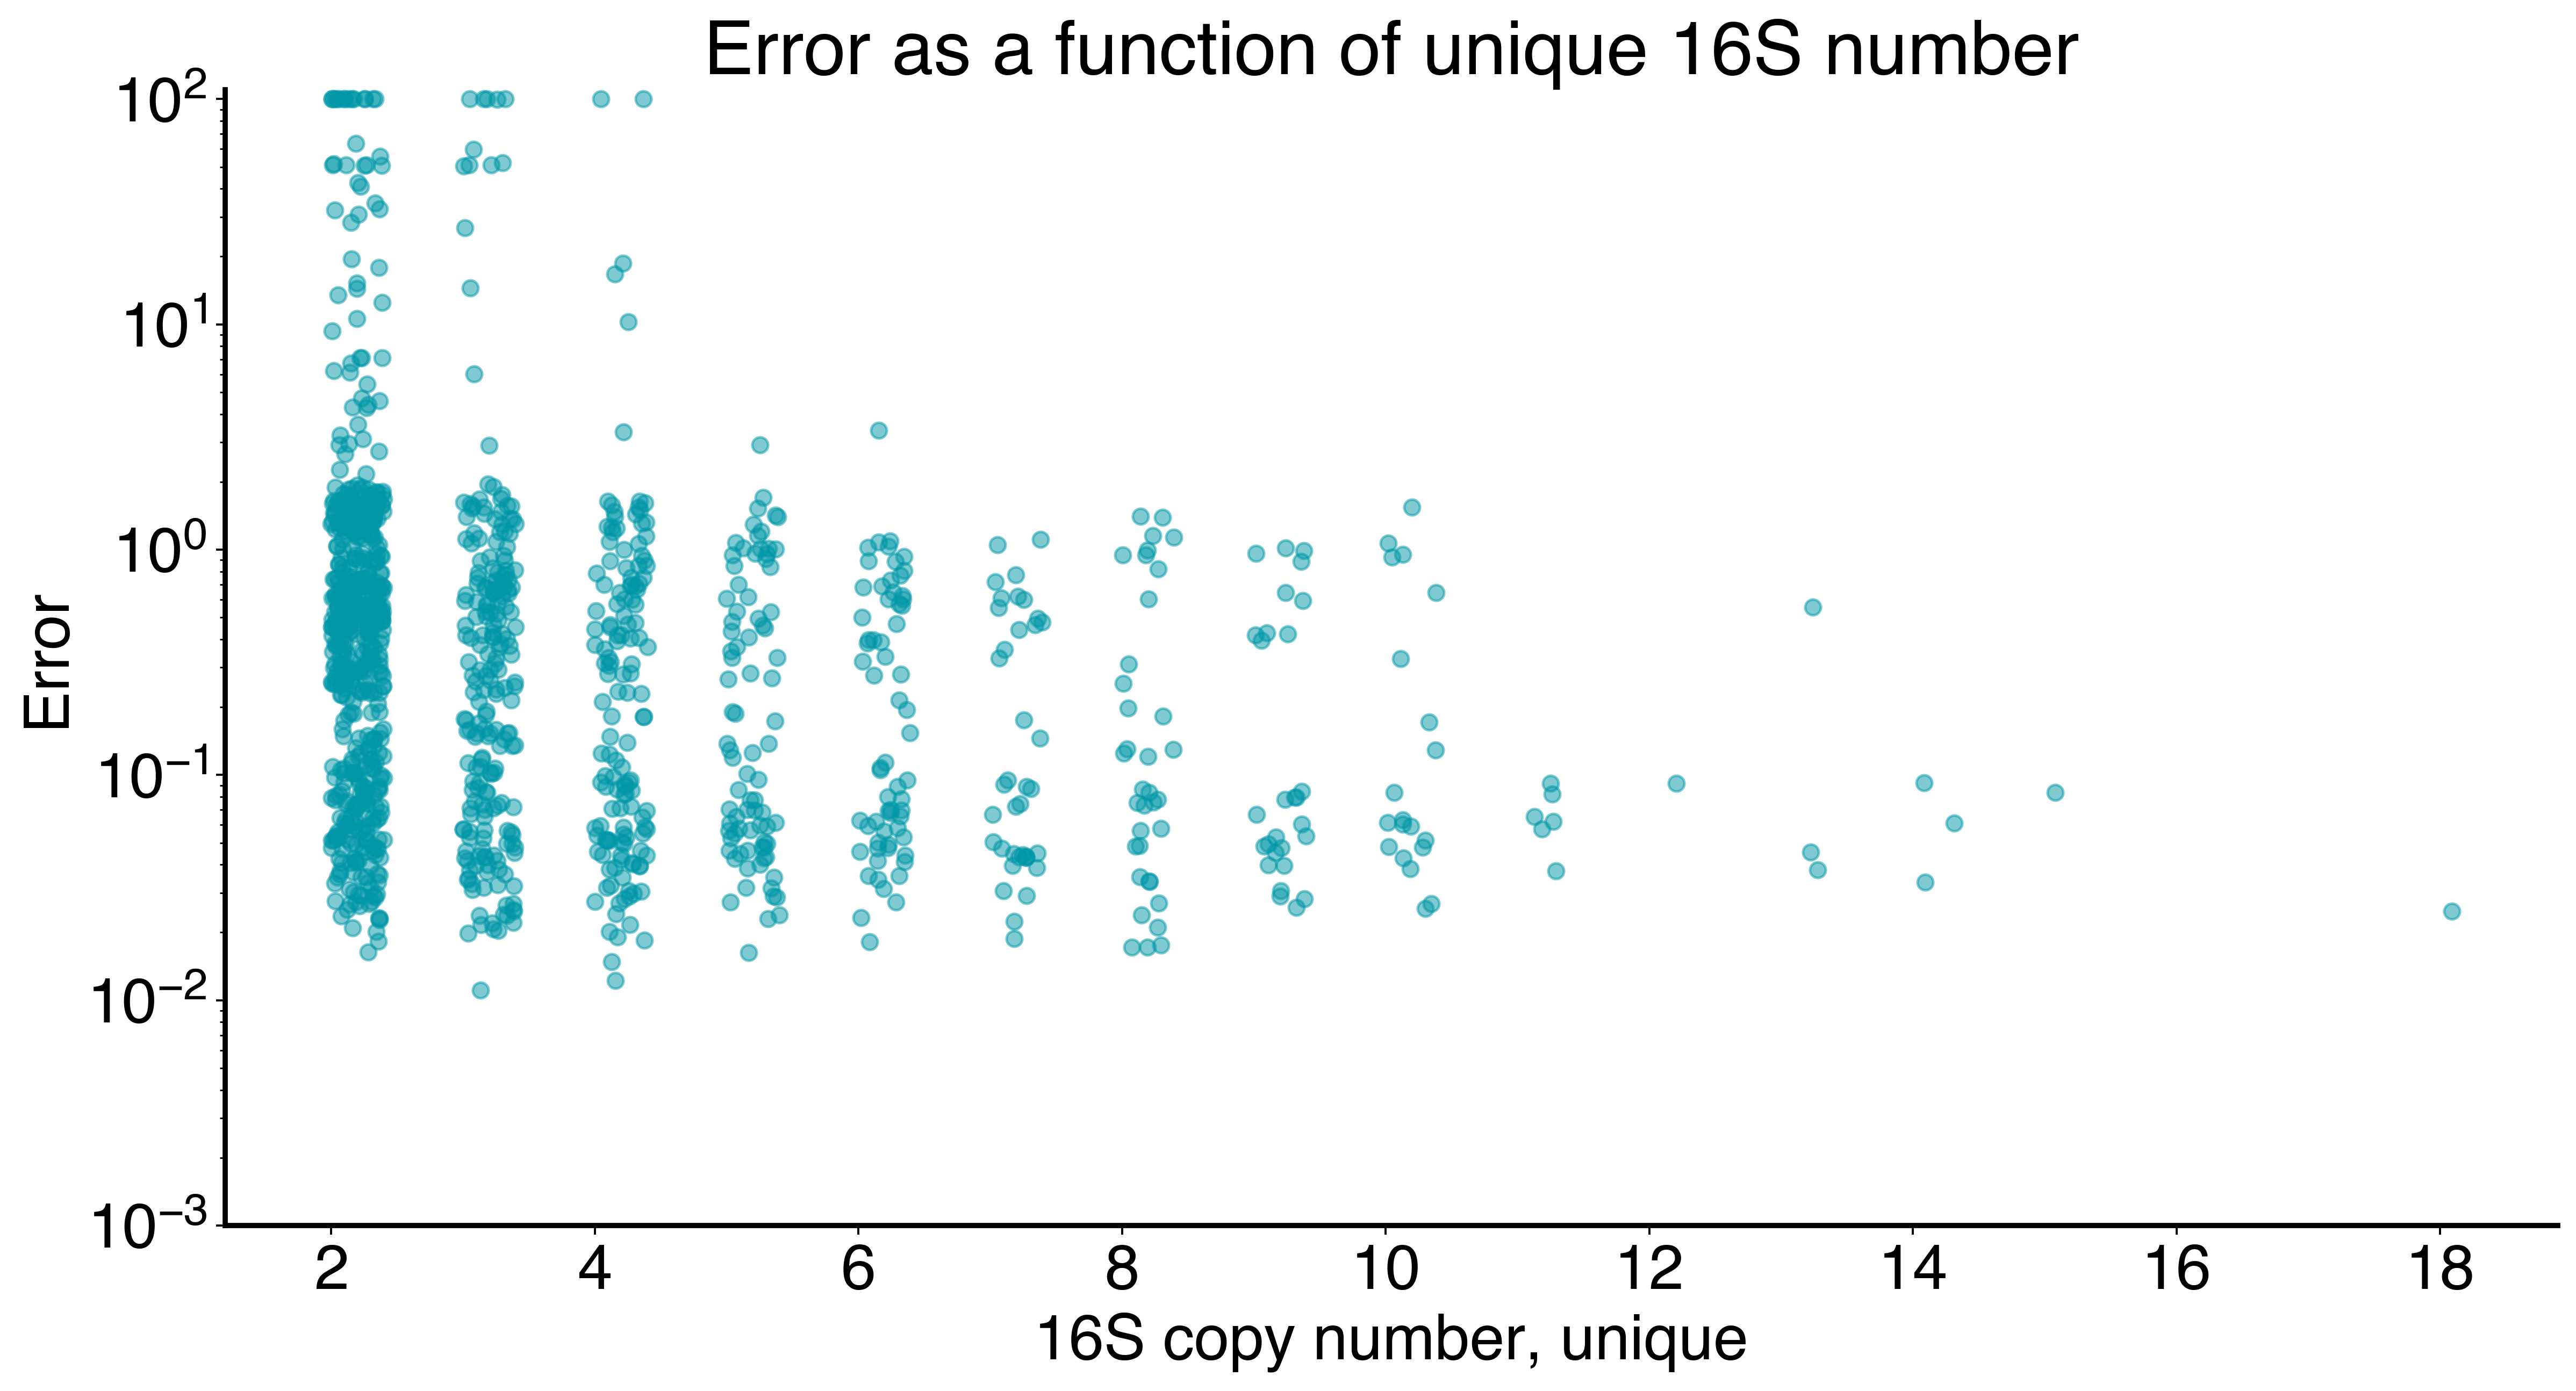

In [37]:
plt.scatter(n_16s_unique + 0.4*(1-np.random.rand(len(meds))), meds, color=blue, alpha=0.5)
plt.yscale('log')
plt.ylim(1e-3, 1e2+10)
plt.xlabel('16S copy number, unique')
plt.ylabel('Error')
plt.title('Error as a function of unique 16S number')

In [84]:
def mindist(arr):
    try:
        return np.min(np.abs([x-y for x in arr for y in arr if x != y]))
    except ValueError:
        return 0

min_16s_dist = db.db[['genome', '16s_position']].groupby('genome').agg(mindist)
lengths = db.db.groupby('genome').mean()['size'].reindex(min_16s_dist.index)
min_16s_dist['16s_position'] = min_16s_dist['16s_position'] / lengths
min_16s_dist = min_16s_dist.reindex(meds.index)

Text(0.5, 1.0, 'Error as a function of minimum 16S distance')

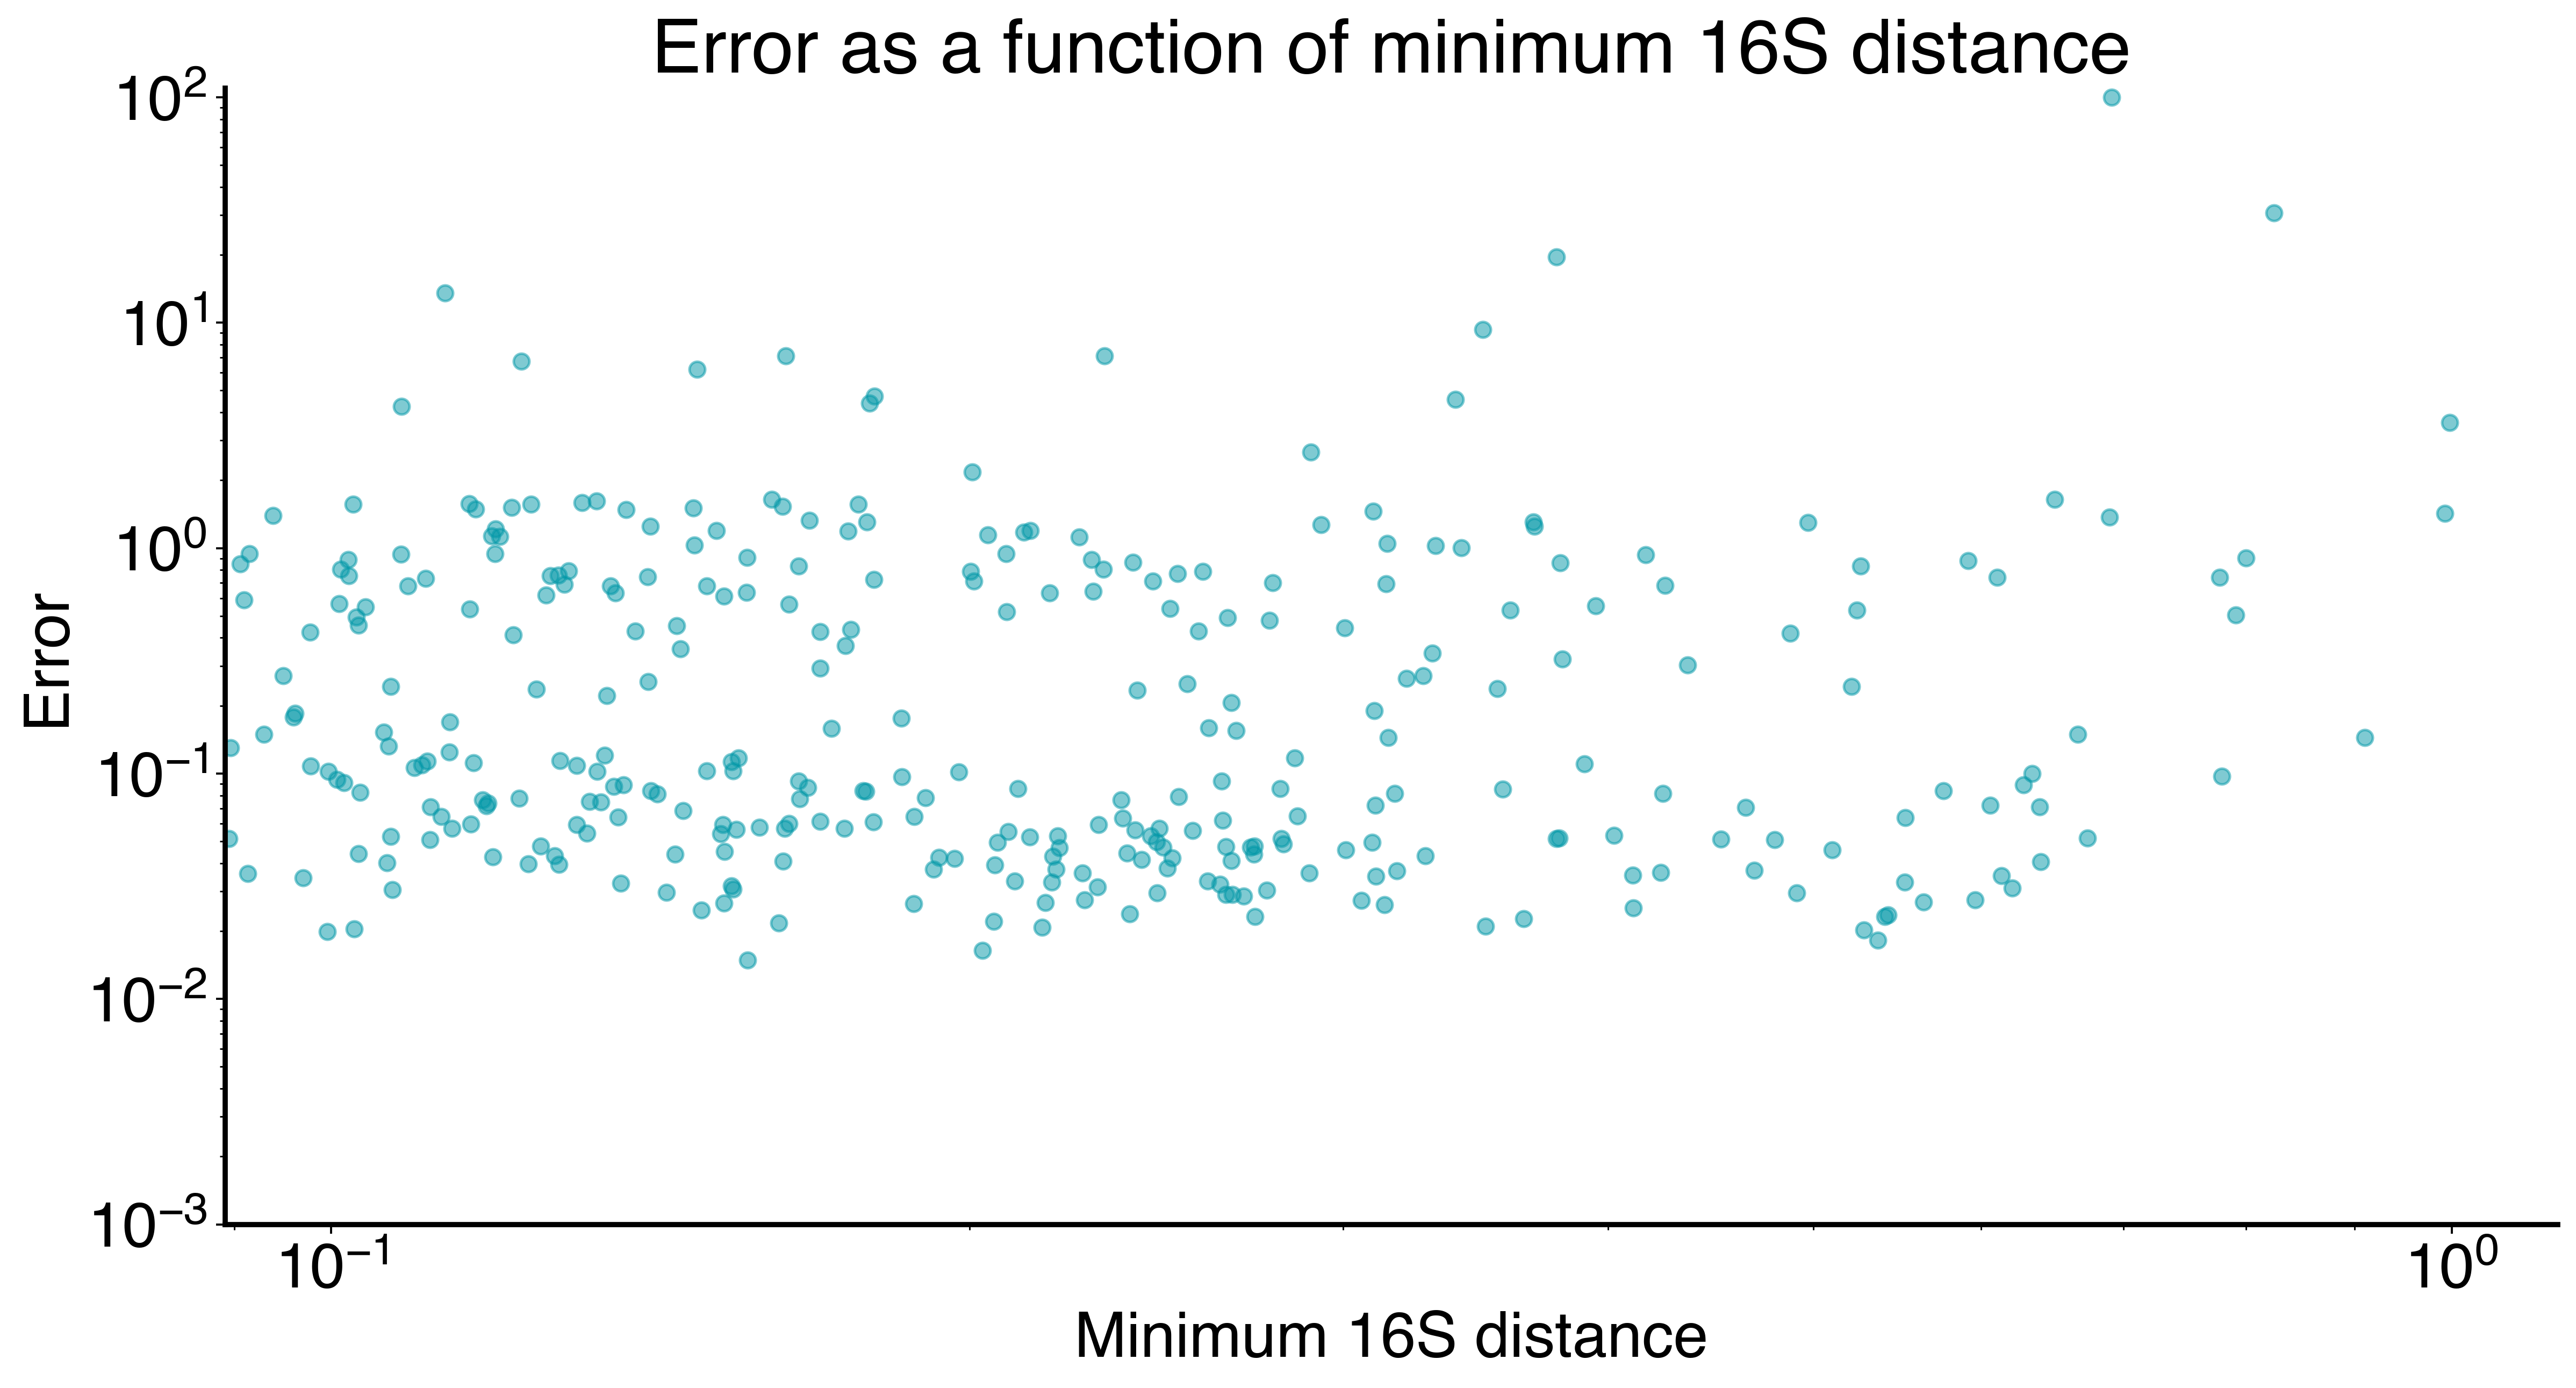

In [156]:
plt.scatter(min_16s_dist['16s_position'], meds.reindex(min_16s_dist.index), color=blue, alpha=0.5)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-3, 1e2+10)
plt.xlabel('Minimum 16S distance')
plt.ylabel('Error')
plt.title('Error as a function of minimum 16S distance')

In [129]:
my_db = db.db.copy()
my_db2 = pd.merge(my_db, meds.rename("Errors"), left_on='genome', right_index=True)

min_dists = {}

for genome in my_db2['genome'].unique():
    my_db_tmp = my_db2[my_db2['genome'] == genome]
    # my_db_grouped = my_db_tmp.groupby('16s_md5')
    allowed_seqs = my_db_tmp['16s_md5'].unique()
    
    global_min_dist = np.inf
    for seq1 in allowed_seqs:
        group1 = my_db_tmp[my_db_tmp['16s_md5'] == seq1]
        for seq2 in allowed_seqs:
            if seq1 != seq2:
                group2 = my_db_tmp[my_db_tmp['16s_md5'] == seq2]
                dists = np.array(group1['16s_position'])[:,None] - np.array(group2['16s_position'])[None,:] # pairwise dists, vectorized operation
                min_dist = np.min(np.abs(dists))
                if min_dist < global_min_dist:
                    global_min_dist = min_dist
    min_dists[genome] = global_min_dist / my_db_tmp['size'].mean()

In [135]:
pd.DataFrame(min_dists, columns=["genome", "err"]).merge(meds.rename("Errors"), left_on="genome", right_index=True)

Empty DataFrame
Columns: [genome, err, Errors]
Index: []

In [137]:
pd.DataFrame(min_dists)

ValueError: ignored

In [149]:
real_min_dists = pd.DataFrame.from_dict(data=min_dists, orient='index').merge(meds.rename('a'), left_index=True, right_index=True)
real_min_dists.columns = ['Distance', 'Error']

Text(0.5, 1.0, 'Error as a function of minimum unique 16S distance')

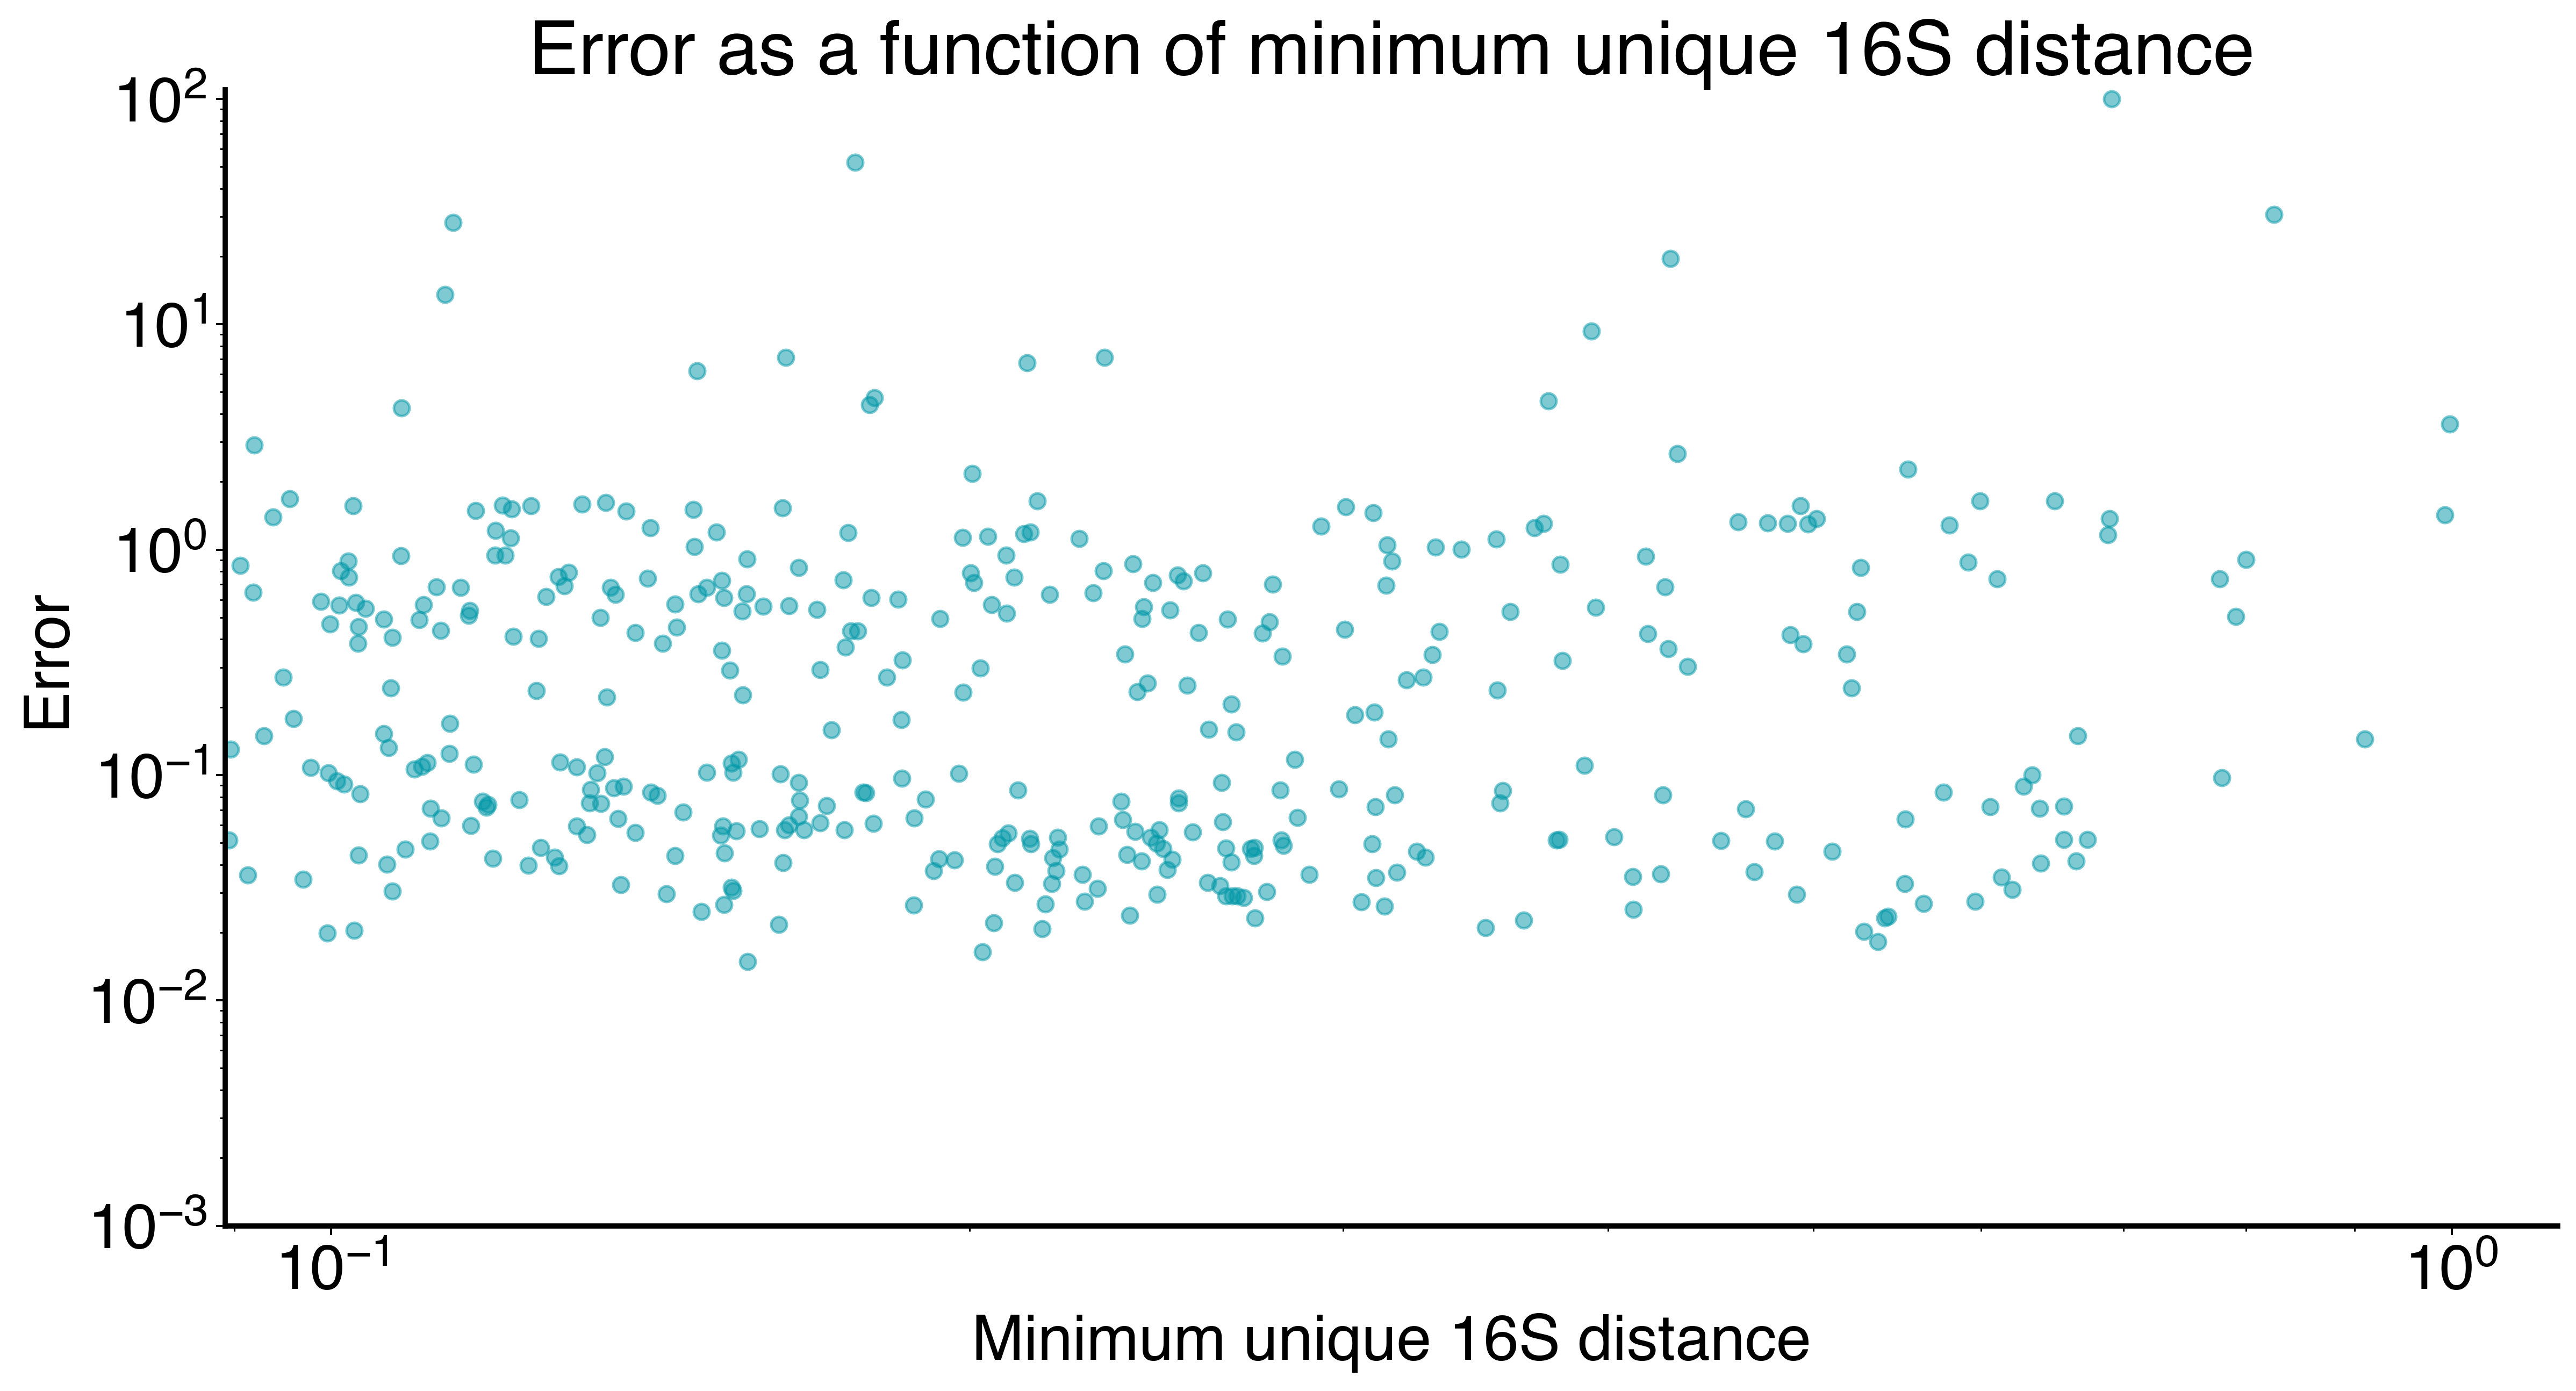

In [155]:
plt.scatter(real_min_dists["Distance"], real_min_dists["Error"], color=blue, alpha=0.5)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-3, 1e2+10)
plt.xlabel('Minimum unique 16S distance')
plt.ylabel('Error')
plt.title('Error as a function of minimum unique 16S distance')